# **Project Name**    - FBI Time Series Analysis



##### **Project Type**    - Time series analysis
##### **Contribution**    - Individual : Ankita Dutta


# **Project Summary -**

The FBI Crime Investigation Project leverages data analytics to predict crime patterns and enhance public safety. With rising crime rates in urban areas, law enforcement agencies need advanced tools to anticipate trends, allocate resources efficiently, and implement proactive measures. This project develops a predictive model to estimate monthly crime incidents using granular day and hour-level data, incorporating crime types, locations, neighborhoods, and timestamps.

This project aims to predict monthly crime incidents using time series analysis, leveraging **machine learning models** such as **ARIMA and LSTM**. By analyzing **historical crime data**, the goal is to enhance public safety by providing law enforcement agencies and policymakers with insights into crime trends. The dataset includes granular details like **crime type, location (latitude and longitude), neighborhood information, and timestamps**, allowing for a comprehensive analysis of crime distribution over time. By analyzing spatial and temporal crime patterns, law enforcement can optimize patrol schedules and resource deployment. Beyond policing, urban planners and policymakers can use these insights to improve public safety measures, guide infrastructure planning, and address social factors contributing to crime.

### **Data Preprocessing and Feature Engineering**  
The project begins with **data loading and cleaning**, ensuring no missing values disrupt model performance. The **incident counts** column is populated based on **ARIMA and LSTM predictions**, depending on which model is more reliable for each crime type. The dataset is then grouped by **month and crime type**, forming a structured time series dataset.  

### **Model Selection and Evaluation**  
Two forecasting models—**ARIMA (AutoRegressive Integrated Moving Average) and LSTM (Long Short-Term Memory neural networks)**—were implemented.  
- **ARIMA** is a statistical approach suitable for stationary time series, capturing linear dependencies over time.  
- **LSTM** is a deep learning-based recurrent neural network model designed to detect complex temporal patterns in sequential data.  

To compare model effectiveness, **Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)** were used. The evaluation showed that both models performed differently across crime types, leading to a **hybrid approach where ARIMA was used for certain crime categories and LSTM for others**. The incident counts were populated using **ARIMA for stable crime trends, LSTM for fluctuating patterns, and their mean where both models had close predictions**.  

### **Visualization and Insights**  
Various **data visualizations** were created to analyze crime trends and compare model predictions. Charts were used to identify crime types with similar and highly differing predictions. The prediction errors across models were visualized to understand **which crime categories were harder to predict**.  

### **Business Impact**  
The FBI and law enforcement agencies can use these crime forecasts to **optimize patrol schedules, allocate personnel more effectively, and deploy resources in high-risk areas**. Urban planners and policymakers can also leverage these insights for **infrastructure planning, safety initiatives, and public awareness campaigns**.  



# **GitHub Link -**

https://github.com/ankitaXdutta/FBI_TimeSeries

# **Problem Statement**


### Business Context  

The **FBI Crime Investigation Project** is a strategic initiative designed to harness the power of data analytics to predict crime patterns and improve public safety. In recent years, urban centers across the United States have faced challenges related to rising crime rates and the complex dynamics of crime occurrences. To address these issues effectively, law enforcement agencies require advanced tools and methodologies that enable them to anticipate crime trends, allocate resources strategically, and implement proactive measures to prevent criminal activities.  

This project focuses on developing a predictive model that estimates the number of crime incidents on a monthly basis using detailed data at the day and hour level. The data includes information such as crime types, geographical coordinates (latitude and longitude), neighborhood details, and time stamps, allowing for a comprehensive analysis of both spatial and temporal patterns in crime data. By understanding when and where crimes are most likely to occur, law enforcement agencies can optimize patrol schedules, allocate personnel more efficiently, and deploy resources where they are needed most.  

The importance of predicting crime incidents extends beyond law enforcement. Urban planners, policymakers, and community leaders can leverage these insights to create safer and more resilient communities. For instance, understanding high-risk areas and times for specific types of crime can guide the placement of public safety measures such as street lighting, surveillance cameras, and community policing initiatives. Additionally, these insights can inform public awareness campaigns, emergency response planning, and collaboration with community organizations to address underlying social issues that contribute to crime.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [22]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore")


### Dataset Loading

In [23]:
import pandas as pd

# URLs for the raw files on GitHub
test_url = 'https://raw.githubusercontent.com/ankitaXdutta/FBI_TimeSeries/refs/heads/master/Test.csv'
train1_url = 'https://raw.githubusercontent.com/ankitaXdutta/FBI_TimeSeries/refs/heads/master/Train1.csv'
train2_url = 'https://raw.githubusercontent.com/ankitaXdutta/FBI_TimeSeries/refs/heads/master/Train2.csv'

# Load the datasets into pandas DataFrames
test_df = pd.read_csv(test_url)
train1_df = pd.read_csv(train1_url)
train2_df = pd.read_csv(train2_url)


In [24]:
train_df = pd.concat([train1_df, train2_df], ignore_index=True)

### Dataset First View

In [25]:
# Dataset First Look
# Display the first few rows of both datasets
print("Train Dataset - First 5 Rows:")
print(train_df.head())

print("\nTest Dataset - First 5 Rows:")
print(test_df.head())

Train Dataset - First 5 Rows:
          TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY        Date  
0  49.269802 -123.083763  16.0    15.0  1999      5   12  12-05-1999  
1  49.269802 -123.083763  15.0    20.0  1999      5    7  07-05-1999  
2  49.269802 -123.083763  16.0    40.0  1999      4   23  23-04-1999  
3  49.269802 -123.083763  11.0    15.0  1999      4   20  20-04-1999  
4  49.269802 -123.083763  17.0    45.0  1999      4   12  12-04-1999  

Test Dataset - First 5 Rows:
   YEAR  MONTH                                               TYPE  \
0  2013     

### Dataset Rows & Columns count

In [26]:
# Dataset Rows & Columns count
# Get the number of rows and columns for each dataset
train_shape = train_df.shape
test_shape = test_df.shape

# Display the number of rows and columns
print(f"Train Dataset - Rows: {train_shape[0]}, Columns: {train_shape[1]}")
print(f"Test Dataset - Rows: {test_shape[0]}, Columns: {test_shape[1]}")

Train Dataset - Rows: 474565, Columns: 13
Test Dataset - Rows: 162, Columns: 4


### Dataset Information

In [27]:
# Dataset Info
print("Train Dataset Info:")
print(train_df.info())

print("\nTest Dataset Info:")
print(test_df.info())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           474565 non-null  object 
 1   HUNDRED_BLOCK  474552 non-null  object 
 2   NEIGHBOURHOOD  423074 non-null  object 
 3   X              474565 non-null  float64
 4   Y              474565 non-null  float64
 5   Latitude       474565 non-null  float64
 6   Longitude      474565 non-null  float64
 7   HOUR           425200 non-null  float64
 8   MINUTE         425200 non-null  float64
 9   YEAR           474565 non-null  int64  
 10  MONTH          474565 non-null  int64  
 11  DAY            474565 non-null  int64  
 12  Date           474565 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 47.1+ MB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #

#### Duplicate Values

In [28]:
# Dataset Duplicate Value Count
# Count duplicates in the Train dataset
train_duplicates = train_df.duplicated().sum()

# Count duplicates in the Test dataset
test_duplicates = test_df.duplicated().sum()

# Display the duplicate counts
print(f"Number of duplicate rows in Train Dataset: {train_duplicates}")
print(f"Number of duplicate rows in Test Dataset: {test_duplicates}")

Number of duplicate rows in Train Dataset: 44618
Number of duplicate rows in Test Dataset: 0


#### Missing Values/Null Values

In [29]:
# Missing Values/Null Values Count
# Count missing values in the train dataset
missing_values_train = train_df.isnull().sum()

# Count missing values in the test dataset
missing_values_test = test_df.isnull().sum()

# Display the missing values count for train dataset
print("Missing Values Count in Train Dataset:")
print(missing_values_train)

# Display the missing values count for test dataset
print("\nMissing Values Count in Test Dataset:")
print(missing_values_test)


Missing Values Count in Train Dataset:
TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

Missing Values Count in Test Dataset:
YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64


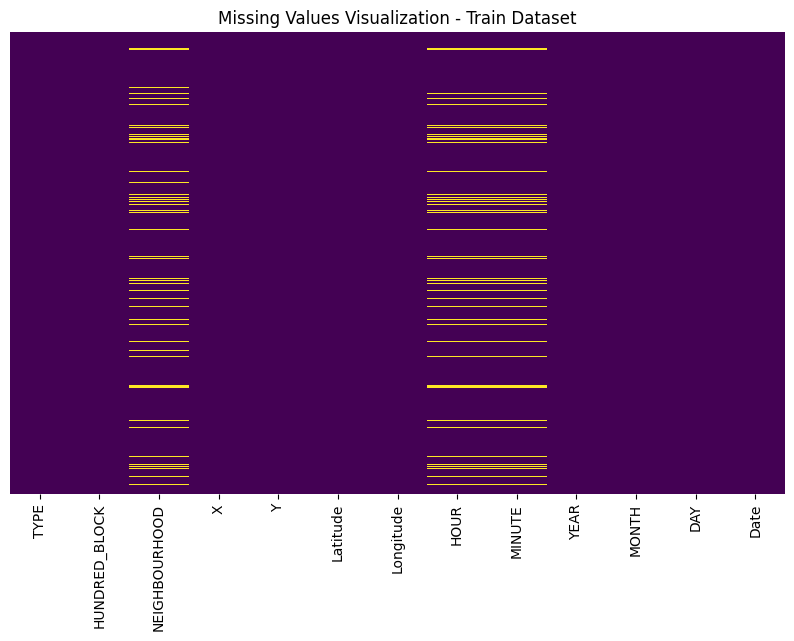

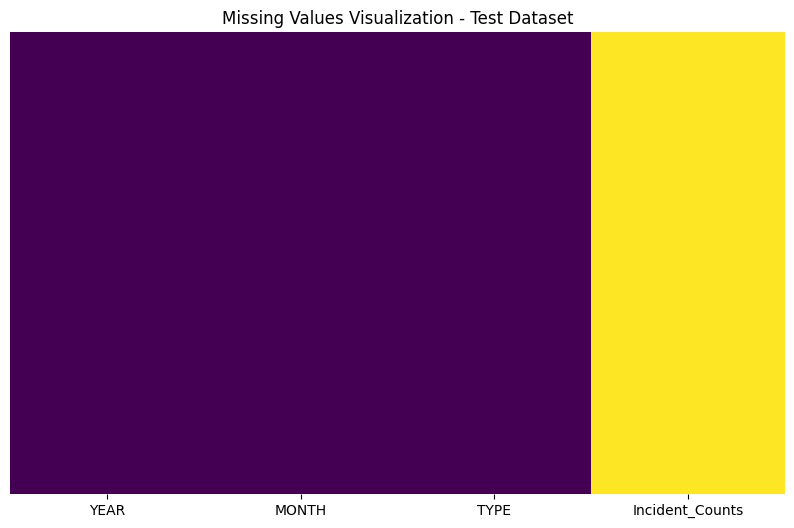

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing missing values in the train dataset
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Visualization - Train Dataset")
plt.show()

# Visualizing missing values in the test dataset
plt.figure(figsize=(10, 6))
sns.heatmap(test_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Visualization - Test Dataset")
plt.show()


### What did you know about your dataset?

The dataset consists of two parts: the Train and Test datasets. The Train dataset contains 474,565 rows and 13 columns, with data primarily related to various crime types, locations, and times. It also includes columns such as HUNDRED_BLOCK, NEIGHBOURHOOD, LATITUDE, LONGITUDE, and timestamp components. There are 44,618 duplicate rows in the Train dataset, which likely indicate repeated instances of similar events, possibly due to the same incidents being recorded multiple times. These duplicates are not necessarily errors and should not be discarded. The Test dataset, which has 162 rows and 4 columns, contains a column Incident_Counts with no values, which may be a placeholder for predictions. Both datasets have missing values, particularly in HUNDRED_BLOCK and NEIGHBOURHOOD in the Train dataset, which require further handling. Visualizations show the missing data, allowing for better insight into where and how to handle these gaps.

## ***2. Understanding Your Variables***

In [31]:
# Dataset Columns
# Display columns of the train dataset
print("Columns in Train Dataset:")
print(train_df.columns)

# Display columns of the test dataset
print("\nColumns in Test Dataset:")
print(test_df.columns)


Columns in Train Dataset:
Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

Columns in Test Dataset:
Index(['YEAR', 'MONTH', 'TYPE', 'Incident_Counts'], dtype='object')


In [32]:
# Dataset Describe
# Describe the train dataset
print("Train Dataset Description:")
print(train_df.describe())

# Describe the test dataset
print("\nTest Dataset Description:")
print(test_df.describe())


Train Dataset Description:
                   X             Y       Latitude      Longitude  \
count  474565.000000  4.745650e+05  474565.000000  474565.000000   
mean   441028.018220  4.889023e+06      44.138029    -110.301025   
std    150295.319332  1.665850e+06      15.039271      37.583147   
min         0.000000  0.000000e+00       0.000000    -124.549757   
25%    489916.530000  5.453572e+06      49.234871    -123.127383   
50%    491477.850000  5.456820e+06      49.264051    -123.107058   
75%    493610.190000  5.458622e+06      49.280300    -123.065646   
max    511303.000000  5.512579e+06      49.755314       0.000000   

                HOUR         MINUTE           YEAR          MONTH  \
count  425200.000000  425200.000000  474565.000000  474565.000000   
mean       13.721263      16.736047    2004.363632       6.555700   
std         6.785751      18.354675       3.850689       3.408676   
min         0.000000       0.000000    1999.000000       1.000000   
25%         9.0

### Variables Description
The Train dataset contains 13 columns, with a mix of categorical, numerical, and date-related variables. The categorical columns include TYPE (indicating the type of crime), HUNDRED_BLOCK (representing the block address), and NEIGHBOURHOOD (describing the area). Numerical columns include X and Y (coordinates), Latitude and Longitude (geographical coordinates), as well as time-related variables like HOUR, MINUTE, YEAR, MONTH, and DAY, which provide details about the time of the incident. The Date and Date_str columns capture the date in both object and string formats. The dataset includes 474,565 rows, capturing crime events over a period from 1999 to 2011.

The Test dataset contains 4 columns: YEAR, MONTH, and TYPE (similar to the Train dataset), along with Incident_Counts, which appears to contain null values. This dataset contains 162 rows and provides a snapshot of incidents in 2012 and 2013, but lacks the detailed time and geographical information present in the Train dataset.

### Check Unique Values for each variable.

In [33]:
# Check Unique Values for each variable.
# Check unique values count for each column in the train dataset
print("Unique Values Count in Train Dataset:")
print(train_df.nunique())

# Check unique values count for each column in the test dataset
print("\nUnique Values Count in Test Dataset:")
print(test_df.nunique())

Unique Values Count in Train Dataset:
TYPE                 9
HUNDRED_BLOCK    20566
NEIGHBOURHOOD       24
X                84225
Y                82768
Latitude         89488
Longitude        87190
HOUR                24
MINUTE              60
YEAR                13
MONTH               12
DAY                 31
Date              4748
dtype: int64

Unique Values Count in Test Dataset:
YEAR                2
MONTH              12
TYPE                9
Incident_Counts     0
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [34]:
# Check the first few rows of the Date column to understand its structure
print(train_df['Date'].head())

# Check the data types of the columns to confirm that 'Date' is an object type
print(train_df['Date'].dtype)

# Check if there are any missing or NaT values in the Date column
print(train_df['Date'].isna().sum())

# Check for unique date formats or possible inconsistencies in the Date column
print(train_df['Date'].unique())


0    12-05-1999
1    07-05-1999
2    23-04-1999
3    20-04-1999
4    12-04-1999
Name: Date, dtype: object
object
0
['12-05-1999' '07-05-1999' '23-04-1999' ... '13-04-2011' '25-02-2011'
 '27-08-2011']


In [35]:
# Convert the 'Date' column to datetime, specifying the format as 'DD-MM-YYYY'
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%d-%m-%Y')

# Now, create the new year, month, and day columns
train_df['year'] = train_df['Date'].dt.year
train_df['month'] = train_df['Date'].dt.month
train_df['day'] = train_df['Date'].dt.day

# Check the result
print(train_df[['Date', 'year', 'month', 'day']].iloc[50:70])


         Date  year  month  day
50 1999-06-30  1999      6   30
51 1999-05-05  1999      5    5
52 1999-02-24  1999      2   24
53 1999-02-04  1999      2    4
54 1999-11-29  1999     11   29
55 1999-01-25  1999      1   25
56 1999-10-03  1999     10    3
57 1999-10-09  1999     10    9
58 1999-11-28  1999     11   28
59 1999-09-06  1999      9    6
60 1999-05-22  1999      5   22
61 1999-05-12  1999      5   12
62 1999-05-10  1999      5   10
63 1999-05-10  1999      5   10
64 1999-08-30  1999      8   30
65 1999-10-16  1999     10   16
66 1999-08-06  1999      8    6
67 1999-07-30  1999      7   30
68 1999-04-13  1999      4   13
69 1999-05-14  1999      5   14


In [36]:
# 1. Encode the 'NEIGHBOURHOOD' column with unique integer codes, 0 for missing values
# First, create a dictionary to map each unique neighbourhood to a unique number
neighbourhood_mapping = {neighbourhood: idx+1 for idx, neighbourhood in enumerate(train_df['NEIGHBOURHOOD'].dropna().unique())}
# Set missing neighbourhoods as 0
train_df['encoded_neighbourhood'] = train_df['NEIGHBOURHOOD'].apply(lambda x: neighbourhood_mapping.get(x, 0))

# 2. Fill missing values in 'NEIGHBOURHOOD' and 'HUNDRED_BLOCK' with "unknown"
train_df['NEIGHBOURHOOD'].fillna('unknown', inplace=True)
train_df['HUNDRED_BLOCK'].fillna('unknown', inplace=True)

# Final Dataset Ready for Analysis
print("Train Dataset After Wrangling:")
print(train_df.info())


Train Dataset After Wrangling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   TYPE                   474565 non-null  object        
 1   HUNDRED_BLOCK          474565 non-null  object        
 2   NEIGHBOURHOOD          474565 non-null  object        
 3   X                      474565 non-null  float64       
 4   Y                      474565 non-null  float64       
 5   Latitude               474565 non-null  float64       
 6   Longitude              474565 non-null  float64       
 7   HOUR                   425200 non-null  float64       
 8   MINUTE                 425200 non-null  float64       
 9   YEAR                   474565 non-null  int64         
 10  MONTH                  474565 non-null  int64         
 11  DAY                    474565 non-null  int64         
 12  Date         

In [37]:
# Display rows from index 50 to 70 of the updated dataframe with the new columns
print(train_df[['NEIGHBOURHOOD', 'encoded_neighbourhood', 'HUNDRED_BLOCK', 'year', 'month', 'day', 'Date']].iloc[50:71])


                NEIGHBOURHOOD  encoded_neighbourhood  \
50        Victoria-Fraserview                      9   
51  Central Business District                      7   
52  Central Business District                      7   
53  Central Business District                      7   
54        Victoria-Fraserview                      9   
55        Victoria-Fraserview                      9   
56  Central Business District                      7   
57                   West End                      6   
58                    unknown                      0   
59                   West End                      6   
60  Central Business District                      7   
61  Central Business District                      7   
62  Central Business District                      7   
63  Central Business District                      7   
64                   West End                      6   
65          Dunbar-Southlands                      3   
66                   West End                   

In [38]:
# verify
# Check how many unique values are present in the 'encoded_neighbourhood' column
unique_neighbourhoods = train_df['encoded_neighbourhood'].nunique()
print(f"Total unique values in 'encoded_neighbourhood': {unique_neighbourhoods}")

# Check for missing values in 'year', 'month', and 'day' columns
missing_values = train_df[['year', 'month', 'day']].isnull().sum()
print(f"Missing values in 'year', 'month', and 'day' columns:\n{missing_values}")


Total unique values in 'encoded_neighbourhood': 25
Missing values in 'year', 'month', and 'day' columns:
year     0
month    0
day      0
dtype: int64


### What all manipulations have you done and insights you found?

In the data wrangling process, I handled the NEIGHBOURHOOD column by numerically encoding it. The encoded_neighbourhood column now has 25 unique values, where each distinct neighbourhood is assigned a unique integer, and missing values are represented as 0 to maintain privacy. This encoding allows for easy comparison and analysis. Additionally, I filled the missing values in the HUNDRED_BLOCK column with the string "unknown". For temporal analysis, I created three new integer columns: year, month, and day, by extracting the respective components from the Date column. After this transformation, there are no missing values in the year, month, and day columns, ensuring that these columns are complete and ready for analysis. The dataset is now more structured and ready for further processing.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

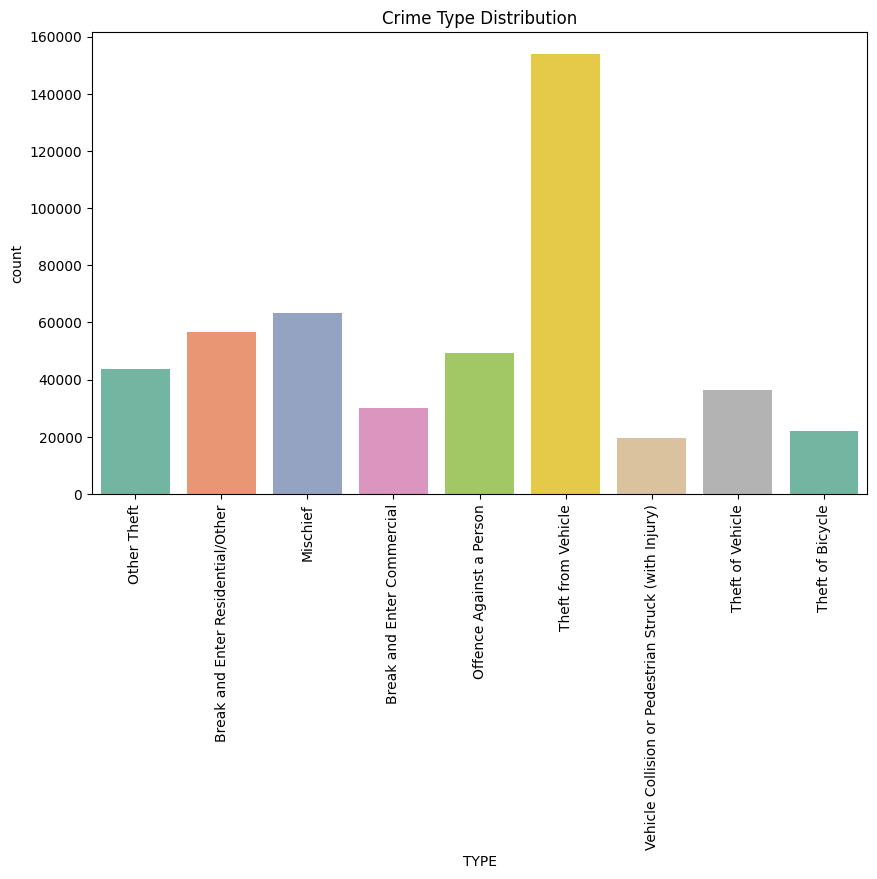

In [39]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for crime type distribution
plt.figure(figsize=(10,6))
sns.countplot(data=train_df, x='TYPE', palette='Set2')
plt.title('Crime Type Distribution')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart was chosen because it effectively visualizes the distribution of crime types, making it easy to compare their relative frequencies. This allows for a clear understanding of which crimes are most common and require the most attention.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that "Theft from Vehicle" is the most frequent crime, occurring nearly 150,000 times, significantly higher than other crimes. "Mischief" and "Break and Enter Residential/Other" also have high occurrences, ranging between 55,000 to 65,000. The least common crimes, such as "Vehicle Collision or Pedestrian Struck (with Injury)" and "Theft of Bicycle," have lower occurrences, around 20,000 to 30,000.

##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes

The FBI can benefit by prioritizing resources for high-frequency crimes like theft-related offenses, ensuring more targeted crime prevention strategies. However, challenges arise in balancing efforts across different crime types, especially lower-frequency but high-impact crimes like violent offenses. Additionally, the high prevalence of theft may indicate broader socio-economic issues that require long-term interventions.

#### Chart - 2

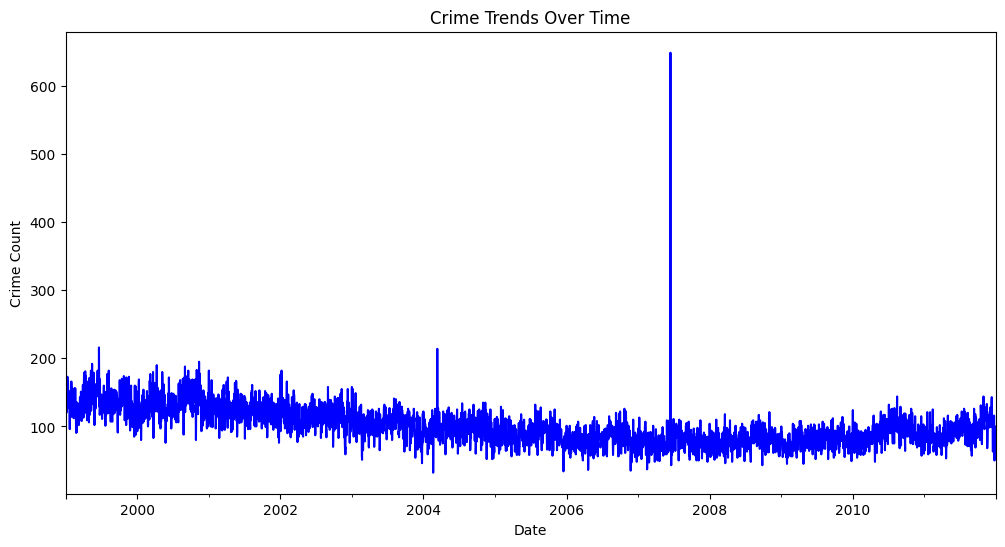

In [40]:
# Chart - 2 visualization code
# Line plot for crime trends over time (monthly)
crime_trends = train_df.groupby('Date')['TYPE'].count()
plt.figure(figsize=(12,6))
crime_trends.plot(kind='line', color='b')
plt.title('Crime Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.show()


##### 1. Why did you pick the specific chart?

The line chart was chosen because it effectively illustrates crime trends over time, showing fluctuations and anomalies in crime counts. This visualization helps in identifying patterns, seasonal trends, and unusual spikes in crime rates.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that crime counts generally fluctuate between 100 and 200 per day, with a slight downward trend in the early 2000s. However, there are two major spikes, one around 2004 and another extreme peak in 2007 exceeding 600 crimes in a day. The crime count appears to slightly increase again after 2010.

##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes

The FBI can benefit by investigating the causes of extreme crime spikes, which could indicate major criminal events or data reporting errors. Additionally, understanding long-term crime patterns helps in resource allocation and policy formulation. Challenges include managing sudden surges in crime and ensuring accurate data interpretation over time.

#### Chart - 3

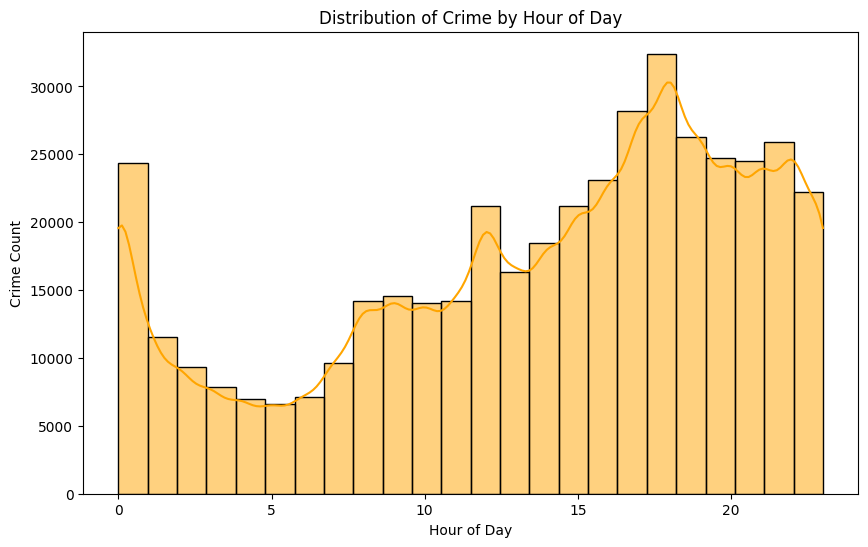

In [41]:
# Chart - 3 visualization code
# Histogram for distribution of crimes by hour of day
plt.figure(figsize=(10,6))
sns.histplot(train_df['HOUR'], bins=24, kde=True, color='orange')
plt.title('Distribution of Crime by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Crime Count')
plt.show()


##### 1. Why did you pick the specific chart?

The histogram was chosen because it effectively displays the distribution of crimes by hour, allowing for a clear understanding of when crime activity is at its peak and lowest throughout the day. The density curve helps visualize the overall trend smoothly.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that crime is highest around midnight (over 25,000 crimes) and significantly drops in the early morning hours, reaching its lowest point around 5-6 AM. Crime rates gradually rise throughout the day, peaking again in the evening, particularly around 7-8 PM, where it exceeds 30,000 incidents.

##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes

The FBI can use this insight to allocate resources more efficiently, increasing patrols and law enforcement presence during peak crime hours. However, challenges include the need for flexible scheduling to accommodate fluctuating crime rates and ensuring adequate coverage during late-night spikes.

#### Chart - 4

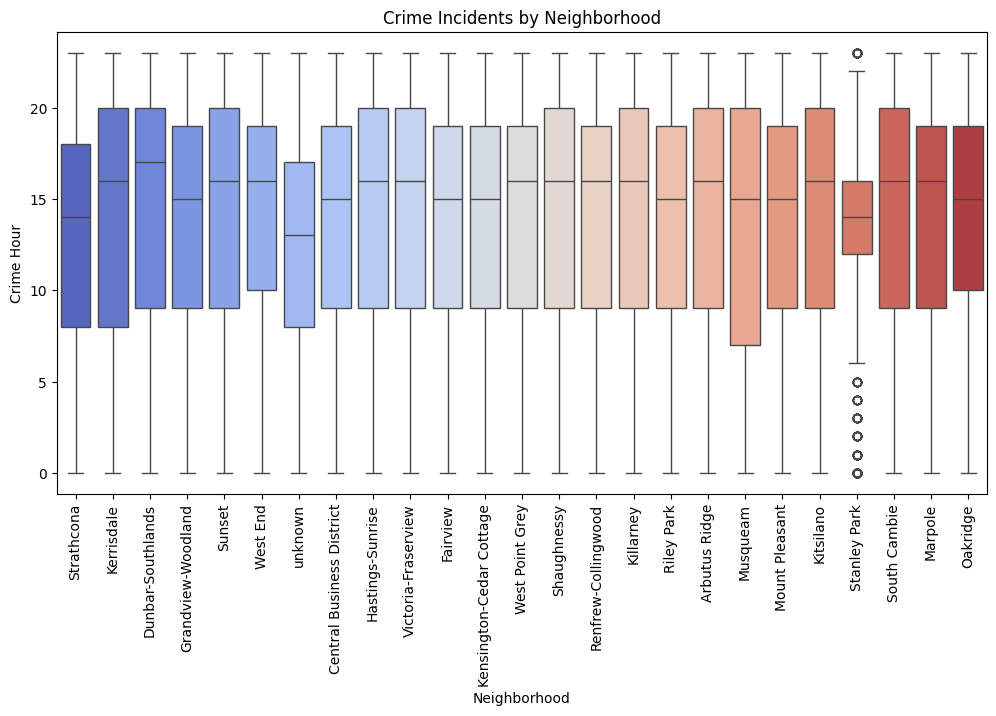

In [42]:
# Chart - 4 visualization code
# Box plot for crime incidents by neighborhood
plt.figure(figsize=(12,6))
sns.boxplot(data=train_df, x='NEIGHBOURHOOD', y='HOUR', palette='coolwarm')
plt.title('Crime Incidents by Neighborhood')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Crime Hour')
plt.show()


##### 1. Why did you pick the specific chart?

The box plot was chosen because it effectively visualizes the distribution and spread of crime incidents by neighborhood, highlighting variations in crime timing and outliers.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that most crimes occur between 10 AM and 10 PM across all neighborhoods, with a median crime hour generally around 3 PM to 6 PM. Some neighborhoods, like Stanley Park, show a notable concentration of early-morning crimes, while others have a wider distribution across the day.

##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes

The FBI can use this insight to optimize patrol schedules and resource allocation based on high-crime periods in different neighborhoods, but challenges may arise in managing unexpected outliers and balancing enforcement presence across multiple areas with different crime patterns.

#### Chart - 5

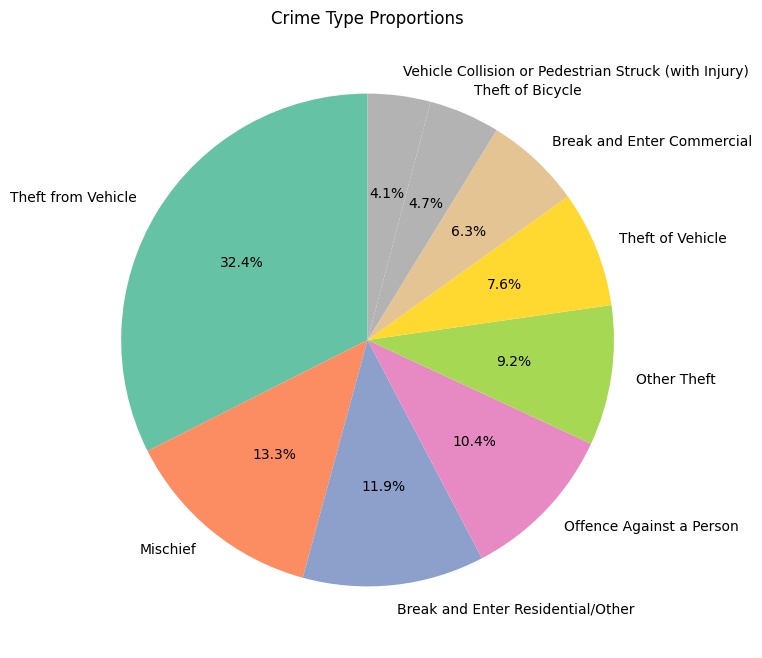

In [43]:
# Chart - 5 visualization code
# Pie chart for crime type proportions
crime_type_counts = train_df['TYPE'].value_counts()
plt.figure(figsize=(8,8))
crime_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Crime Type Proportions')
plt.ylabel('')
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart was chosen because it clearly represents the proportional distribution of different crime types, making it easy to compare their relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that theft from vehicles is the most common crime, accounting for 32.4% of incidents, followed by mischief (13.3%) and break-and-enter residential crimes (11.9%). Less frequent crimes include vehicle collisions (4.1%) and bicycle theft (4.7%).

##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes

The FBI can use these insights to prioritize crime prevention strategies, focusing on reducing vehicle-related thefts. However, challenges may arise in addressing less frequent but high-impact crimes, which may require different investigative approaches.

#### Chart - 6

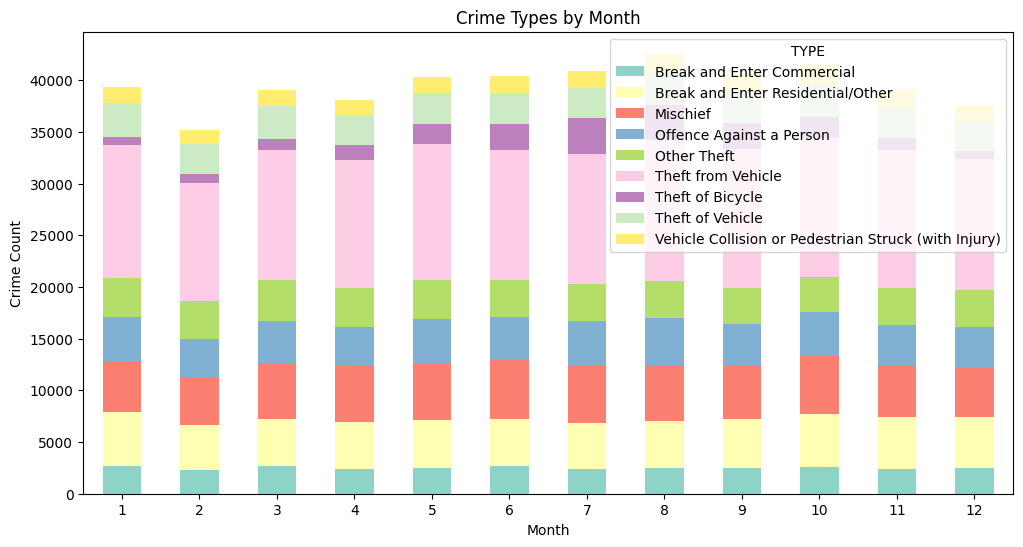

In [44]:
# Chart - 6 visualization code
# Stacked bar chart for crime types by month
crime_month = train_df.groupby(['MONTH', 'TYPE']).size().unstack()
crime_month.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.title('Crime Types by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.xticks(rotation=0)
plt.show()


##### 1. Why did you pick the specific chart?

The stacked bar chart was chosen because it effectively shows the distribution of different crime types over the months, making it easy to identify trends and seasonal variations.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that crime rates fluctuate slightly across months, with peaks around May and August, exceeding 40,000 incidents, while February and December have the lowest crime counts. Theft from vehicles remains the dominant crime type across all months, followed by mischief and break-and-enter cases.

##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes

The FBI can benefit by allocating resources more efficiently during peak crime months, but challenges may arise in addressing sudden crime spikes and ensuring year-round crime prevention strategies.

#### Chart - 7

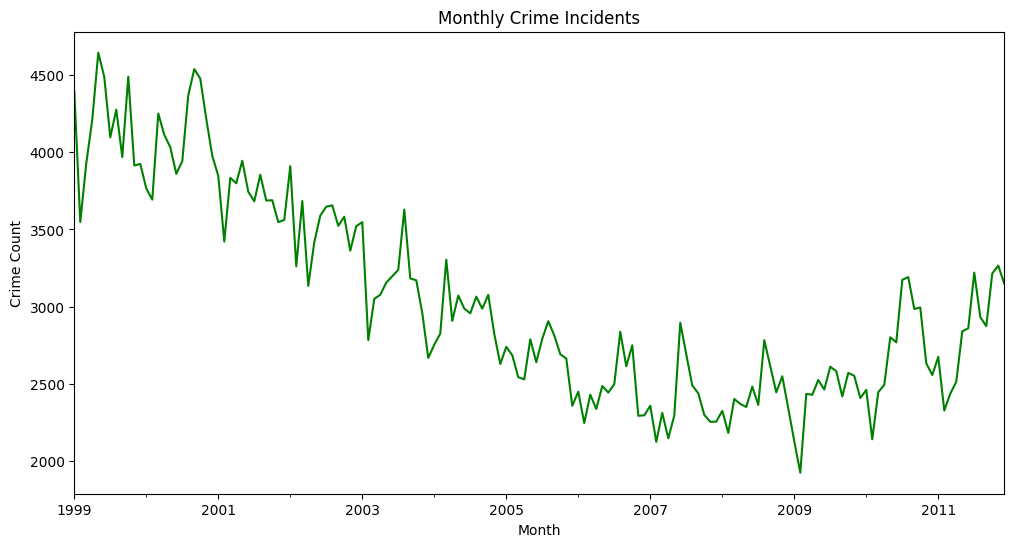

In [45]:
# Chart - 7 visualization code
# Time series plot for monthly crime incidents
monthly_crime = train_df.groupby('Date')['TYPE'].count().resample('M').sum()
plt.figure(figsize=(12,6))
monthly_crime.plot(kind='line', color='green')
plt.title('Monthly Crime Incidents')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()


##### 1. Why did you pick the specific chart?

The choice of a line chart is appropriate because it clearly shows long-term trends, seasonal variations, and anomalies in crime rates.

##### 2. What is/are the insight(s) found from the chart?

The line graph effectively illustrates trends in monthly crime incidents over time, highlighting a general decline from 1999 to 2007, followed by fluctuations and a slight upward trend from 2008 onward. The decline in crime may indicate successful law enforcement strategies, economic changes, or other social factors, while the increase in later years suggests potential emerging threats or policy shifts.

##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes

The FBI can use this information to analyze policy effectiveness, predict future crime trends, and allocate resources more efficiently. Challenges may include identifying the exact causes behind fluctuations and ensuring real-time data updates for better decision-making.

#### Chart - 8

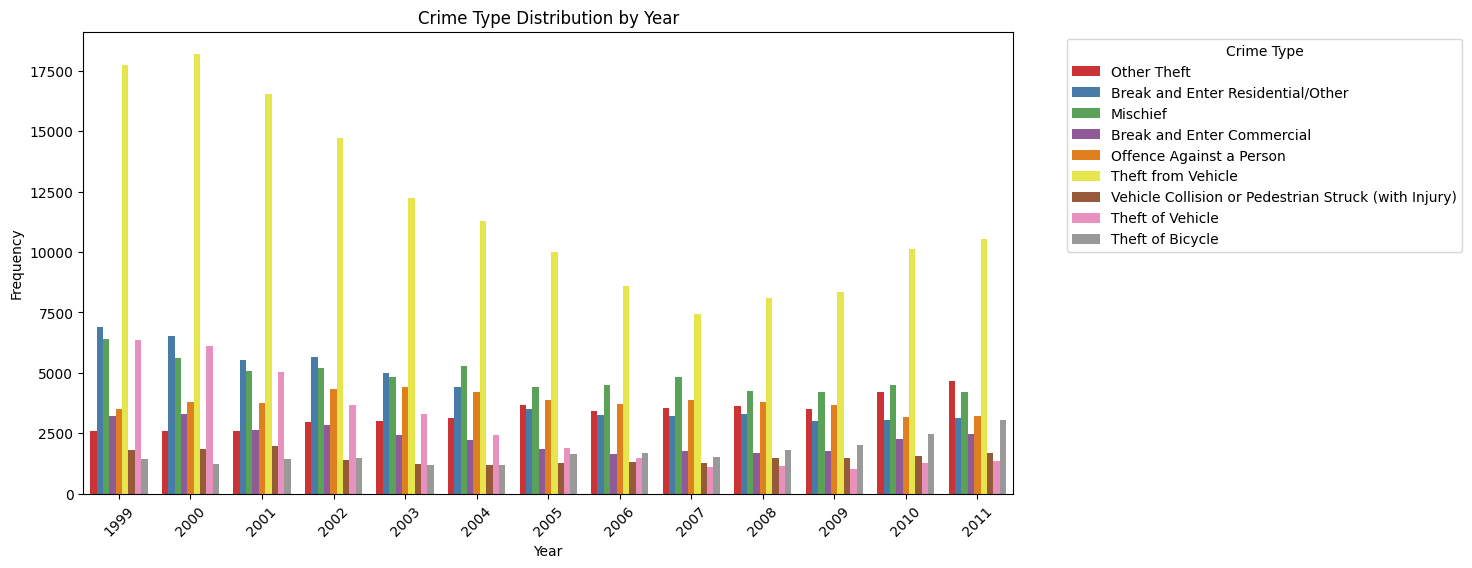

In [46]:
# Chart - 8 visualization code

# Bar plot for Crime Type Distribution by Year
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='YEAR', hue='TYPE', palette='Set1')
plt.title('Crime Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



##### 1. Why did you pick the specific chart?

The bar chart was chosen because it effectively compares different crime types over multiple years, allowing for a clear visualization of trends and frequency distributions. It enables an easy understanding of which crime categories are most prevalent and how they evolve over time.


##### 2. What is/are the insight(s) found from the chart?


The chart reveals that "Theft from Vehicle" consistently has the highest frequency, peaking around 18,000 incidents in 2000 before declining and stabilizing at around 10,000 in later years. Other crimes, such as "Break and Enter Residential/Other" and "Mischief," show moderate declines, while "Theft of Vehicle" and "Other Theft" maintain steady levels. Notably, there is a general downward trend in most crime categories from 1999 to 2007, followed by some fluctuations.



##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes

The FBI can benefit by focusing on the most prevalent crimes, such as theft-related offenses, and allocating resources accordingly. Challenges may arise in addressing the causes of fluctuations, ensuring long-term crime prevention, and adapting to changing crime patterns that may be influenced by external factors such as economic shifts or policy changes.

#### Chart - 9

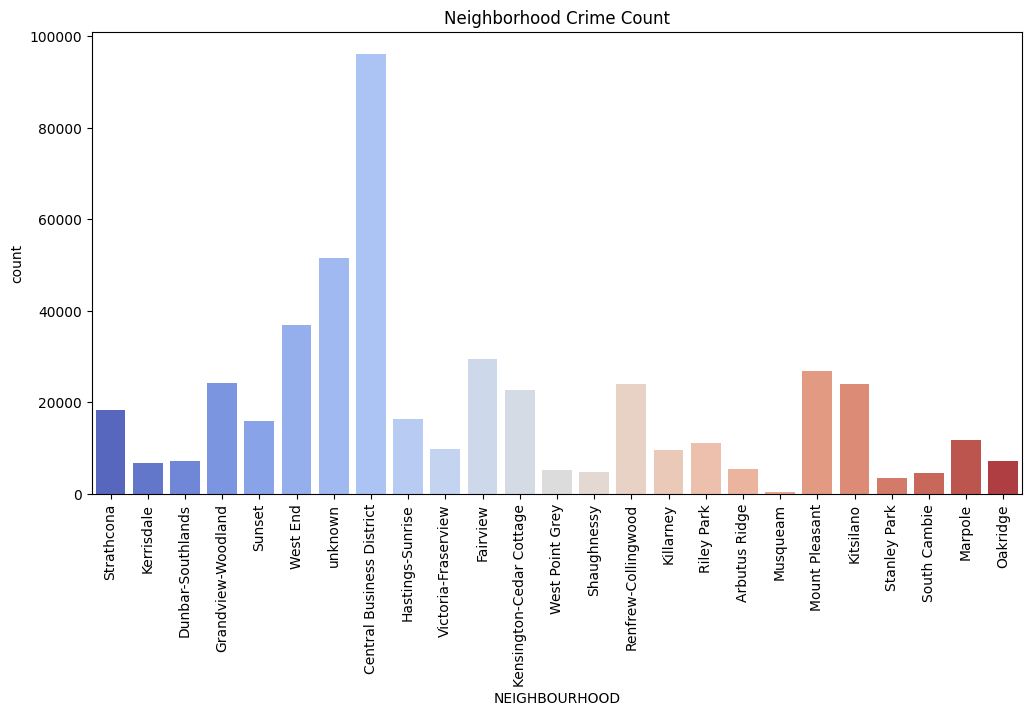

In [47]:
# Chart - 9 visualization code
# Bar chart for neighborhood crime count
plt.figure(figsize=(12,6))
sns.countplot(data=train_df, x='NEIGHBOURHOOD', palette='coolwarm')
plt.title('Neighborhood Crime Count')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart was chosen because it effectively visualizes crime distribution across different neighborhoods, highlighting areas with higher or lower crime counts. The use of color gradients helps to distinguish crime frequency among different neighborhoods clearly.  



##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the "Central Business District" has the highest crime count, nearing 100,000 incidents, significantly surpassing all other areas. "West End" and "Unknown" also show high crime counts, around 50,000 and 60,000, respectively. Several neighborhoods, including "Dunbar-Southlands" and "Kerrisdale," report much lower crime levels, staying below 10,000 incidents. The disparity in crime distribution suggests certain hotspots requiring focused intervention.  


##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes


For the FBI, the data helps prioritize resource allocation by identifying high-crime neighborhoods that require stronger law enforcement and preventive measures. Challenges include addressing crime hotspots effectively while understanding the socio-economic factors contributing to crime patterns and ensuring smaller neighborhoods do not become overlooked in policy-making.

#### Chart - 10

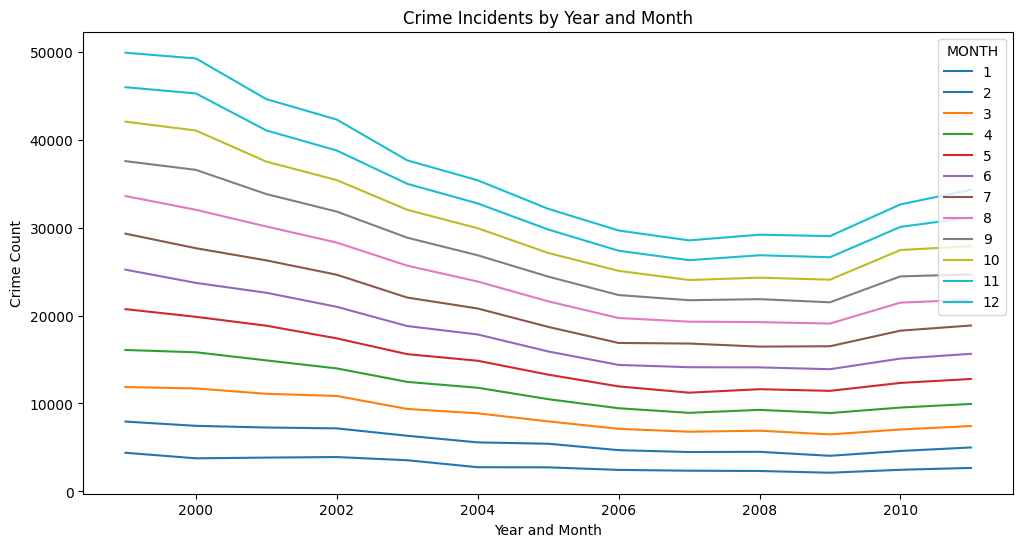

In [48]:
# Chart - 10 visualization code
# Stacked line plot for crime incidents by year and month
crime_by_year_month = train_df.groupby(['YEAR', 'MONTH']).size().unstack()
crime_by_year_month.plot(kind='line', stacked=True, figsize=(12,6), colormap='tab10')
plt.title('Crime Incidents by Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('Crime Count')
plt.show()


##### 1. Why did you pick the specific chart?

The line chart was chosen because it clearly shows the monthly trends in crime over several years, allowing us to observe seasonal patterns, long-term shifts, and comparisons between different months. It's effective for identifying which months tend to experience more or fewer crimes across time.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that December consistently records the highest crime counts, exceeding 50,000 incidents in 1999 and gradually decreasing to around 34,000 by 2009. Other high-crime months include November and October, while January and February show the lowest counts, typically under 10,000 incidents. There's a general downward trend from 1999 to 2007 across all months, followed by a slight rise after 2008.



##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes

The FBI can benefit by preparing for increased crime activity during year-end months, allowing for better planning of patrols, campaigns, and preventive actions. However, challenges include handling resource strain during peak months and understanding the social or environmental drivers behind seasonal crime patterns.

#### Chart - 11

In [49]:
# Chart - 11 visualization code
import plotly.express as px

# Treemap for crime types by neighborhood
crime_treemap = train_df.groupby(['NEIGHBOURHOOD', 'TYPE']).size().reset_index(name='count')
fig = px.treemap(crime_treemap, path=['NEIGHBOURHOOD', 'TYPE'], values='count', color='count', hover_data=['NEIGHBOURHOOD', 'TYPE'])
fig.update_layout(title='Crime Types by Neighborhood')
fig.show()


##### 1. Why did you pick the specific chart?

The treemap was chosen because it effectively displays crime types across different neighborhoods while showing their relative frequency using size and color. This interactive visualization helps in quickly identifying patterns and comparing crime distributions across areas.  



##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the "Central Business District" has the highest crime occurrences, particularly "Theft from Vehicle," which dominates in many neighborhoods. "Offence Against a Person" under the "unknown" category is also significant. Crimes like "Mischief" and "Other Theft" are common across multiple areas. The color intensity further highlights the concentration of specific crimes, with bright yellow indicating the highest counts.  



##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes

The FBI can benefit from identifying high-crime zones and focusing resources on major hotspots like the Central Business District. However, challenges include dealing with unclassified ("unknown") offenses and efficiently distributing law enforcement to prevent theft-related crimes, which are widespread in multiple neighborhoods.

#### Chart - 12

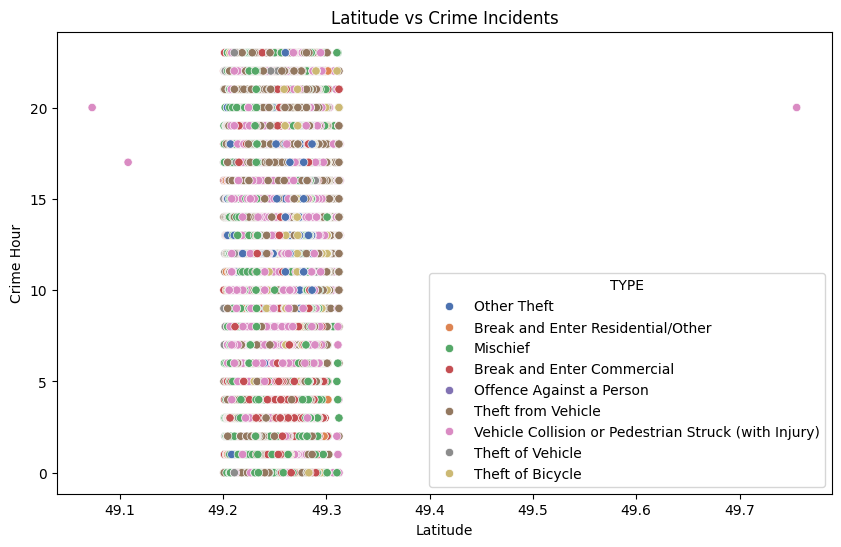

In [50]:
# Chart - 12 visualization code
# Scatter plot for latitude vs. crime incidents
plt.figure(figsize=(10,6))
sns.scatterplot(x=train_df['Latitude'], y=train_df['HOUR'], hue=train_df['TYPE'], palette='deep')
plt.title('Latitude vs Crime Incidents')
plt.xlabel('Latitude')
plt.ylabel('Crime Hour')
plt.show()


##### 1. Why did you pick the specific chart?

The scatter plot was chosen because it effectively visualizes crime distribution by latitude and time, allowing for pattern recognition in spatial and temporal crime trends. Different crime types are color-coded, making it easier to identify correlations.  



##### 2. What is/are the insight(s) found from the chart?

The chart shows that most crimes are concentrated around specific latitude values (approximately 49.2–49.4), suggesting high-crime zones. Crime incidents are fairly evenly distributed across different hours, but certain types, like "Vehicle Collision or Pedestrian Struck (with Injury)," appear sporadically. Theft-related crimes are dominant across all hours, showing no strong time preference.  


##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes


The FBI can use this to focus on high-crime latitudes for preventive measures and patrol adjustments. However, challenges include managing crime spread across all hours and addressing sporadic but severe incidents like vehicle collisions, which require different response strategies.

#### Chart - 13

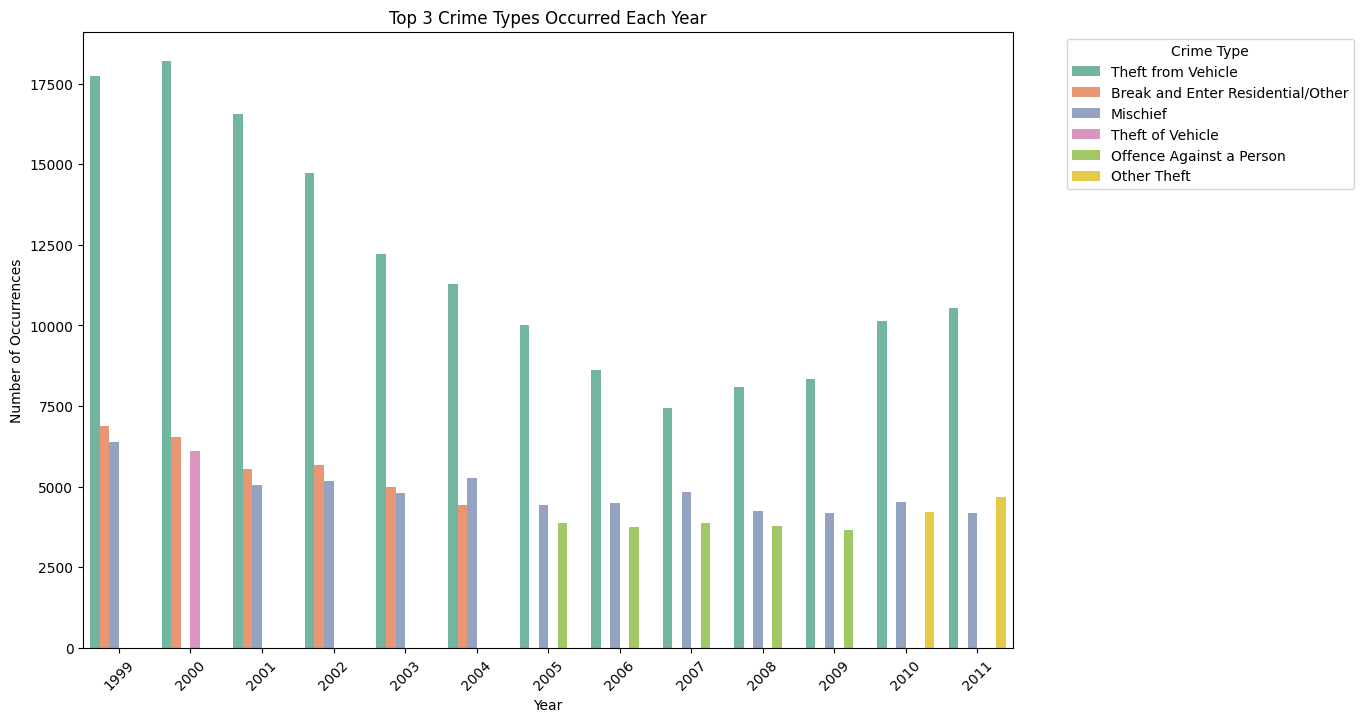

In [51]:
# Chart - 13 visualization code
# Count the occurrences of each crime type per year
crime_counts = train_df.groupby(['YEAR', 'TYPE']).size().reset_index(name='count')

# Sort by year and count to identify the top 3 crime types each year
crime_counts_sorted = crime_counts.sort_values(by=['YEAR', 'count'], ascending=[True, False])

# Select the top 3 crime types for each year
top_3_crimes = crime_counts_sorted.groupby('YEAR').head(3)

# Plot the top 3 crimes per year
plt.figure(figsize=(12, 8))
sns.barplot(data=top_3_crimes, x='YEAR', y='count', hue='TYPE', palette='Set2')
plt.title('Top 3 Crime Types Occurred Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart displays the top three most frequent crime types each year. It highlights trends in crime over time, particularly emphasizing fluctuations in certain crime categories.

##### 2. What is/are the insight(s) found from the chart?

"Theft from Vehicle" is consistently the highest-reported crime, with a peak in 1999-2000 and a decline in later years.

"Break and Enter Residential/Other" and "Mischief" were more common in earlier years but declined after the mid-2000s.

A shift occurs around 2005, where "Offence Against a Person" and "Other Theft" start appearing more frequently in the top three categories, suggesting changes in crime patterns.

##### 3. From insights, how will FBI benefit positively or face challanges while solving or analysing crimes

The FBI can use this to allocate resources effectively, focusing on reducing vehicle theft while monitoring emerging crime trends. However, a limitation is that this visualization doesn’t show absolute crime levels—it only presents relative changes in the top three categories each year.

#### Chart - 14 - Correlation Heatmap

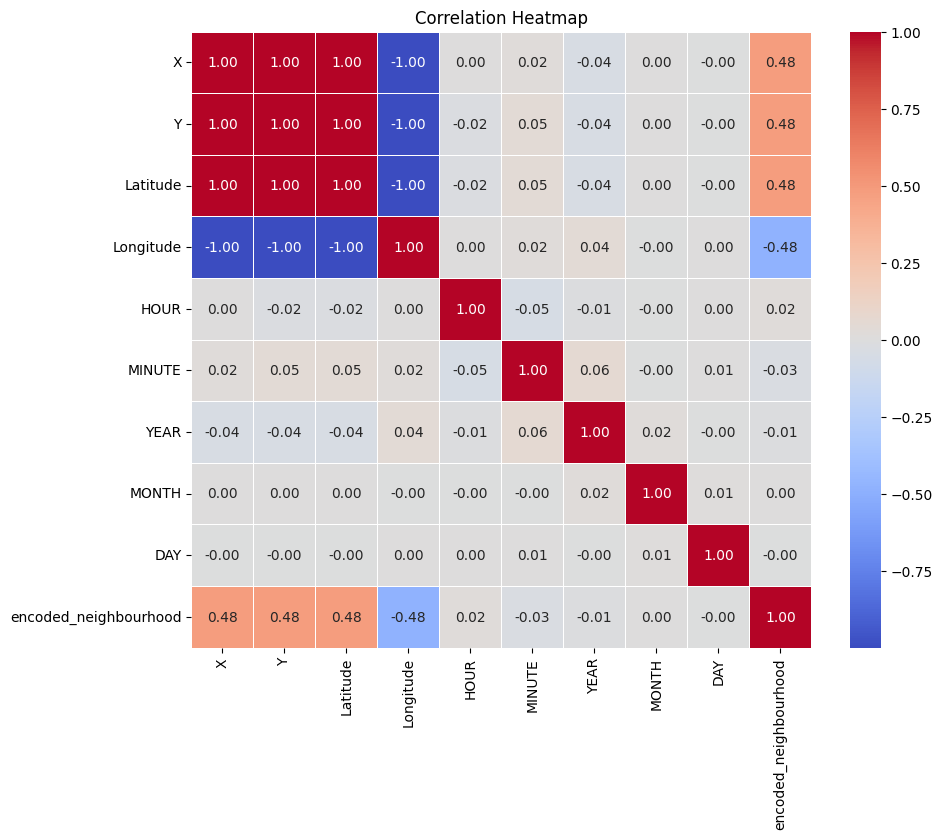

In [52]:
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns from the DataFrame
numeric_columns = train_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap')
plt.show()



##### 1. Why did you pick the specific chart?

The correlation heatmap was chosen because it effectively visualizes relationships between numerical variables in the dataset, highlighting both strong and weak correlations. It provides an intuitive way to detect multicollinearity and dependencies between features, which is crucial for data preprocessing and feature selection.  


##### 2. What is/are the insight(s) found from the chart?


From the chart, "X," "Y," and "Latitude" are perfectly correlated (1.00) and inversely correlated with "Longitude" (-1.00), indicating redundancy in spatial data. "Encoded_neighbourhood" shows a moderate correlation (~0.48) with "X," "Y," and "Latitude," suggesting location-based clustering of crime. "Hour," "Minute," and "Year" have weak correlations (<0.06) with other variables, meaning time-based factors might not strongly influence spatial crime distribution.

#### Chart - 15 - Pair Plot

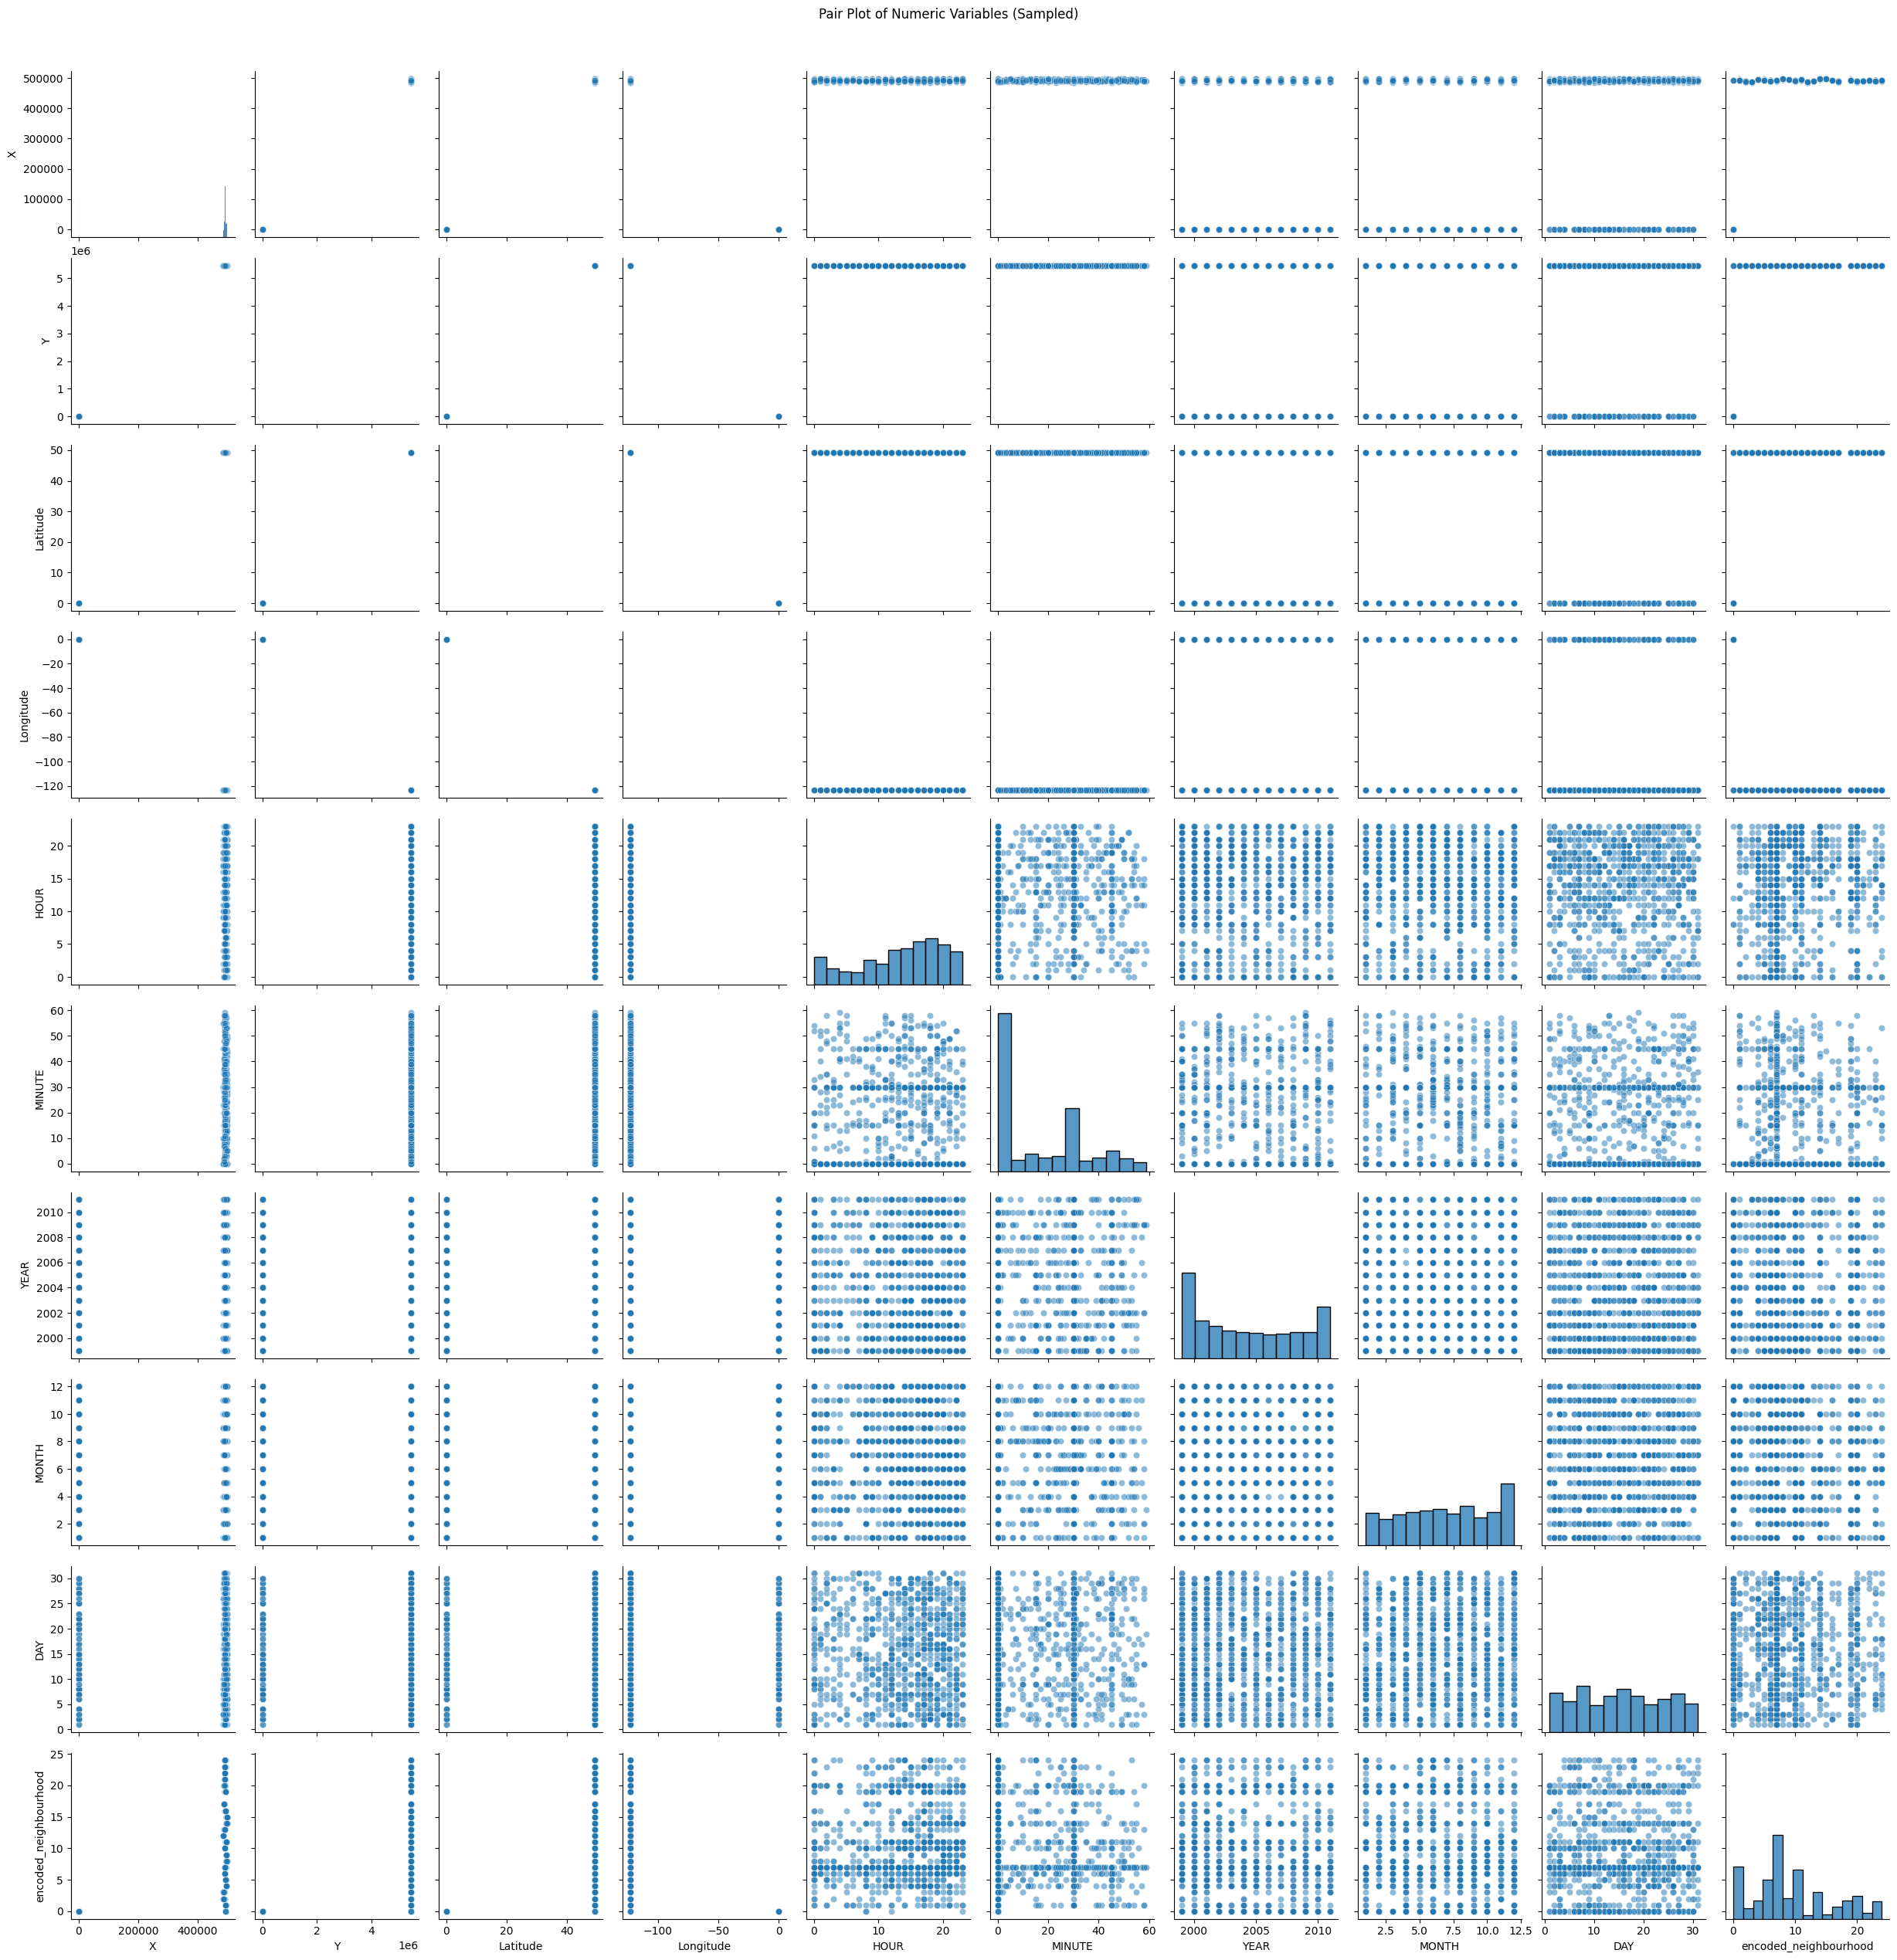

In [53]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Take a random sample of 1000 rows from the train dataset
sample_df = train_df.sample(n=1000, random_state=42)

# Select numeric columns from the sampled dataset
numeric_columns = sample_df.select_dtypes(include=['float64', 'int64'])

# Create a pair plot to visualize the relationships between numeric variables
sns.pairplot(numeric_columns, kind='scatter', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Numeric Variables (Sampled)', y=1.02)  # Add a title
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot was chosen because it visually explores pairwise relationships between numerical variables, making it easier to detect trends, clusters, and potential correlations in the dataset. It also provides insight into variable distributions, helping identify outliers and patterns that might impact modeling.  


##### 2. What is/are the insight(s) found from the chart?


From the chart, "Latitude" and "Longitude" show a clear structured pattern, suggesting distinct spatial clustering of data points. "Hour" and "Minute" exhibit discrete groupings, indicating time-based occurrences rather than a continuous distribution. "Encoded_neighbourhood" is categorical, leading to columnar distributions when plotted against numerical variables. Some variables, like "Year," have very limited variability, implying they may not contribute significantly to predictive models.

## ***5. Hypothesis Testing***

In [88]:
# Display column names
print("Column Names:")
print(train_df.columns)

# Display first few rows to understand data format
print("\nSample Data:")
print(train_df.head())

# Display data types of each column
print("\nData Types:")
print(train_df.dtypes)

# Check unique values for categorical columns
print("\nUnique values in categorical columns:")
for col in train_df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {train_df[col].unique()[:10]}")  # Show only first 10 unique values for readability


Column Names:
Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date', 'year',
       'month', 'day', 'encoded_neighbourhood', 'time_category'],
      dtype='object')

Sample Data:
          TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY       Date  year  \
0  49.269802 -123.083763  16.0    15.0  1999      5   12 1999-05-12  1999   
1  49.269802 -123.083763  15.0    20.0  1999      5    7 1999-05-07  1999   
2  49.269802 -123.083763  16.0    40.0  1999      4   23 1999-04-23  19

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average number of recorded events is significantly higher during peak hours (8 AM - 8 PM) compared to off-peak hours (8 PM - 8 AM).

2. The distribution of crime types varies significantly across different years.

3. Certain types of events are more frequent in specific neighborhoods compared to others.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The average number of recorded events during peak hours (8 AM - 8 PM) is equal to the average number of recorded events during off-peak hours (8 PM - 8 AM).

Alternate Hypothesis (H₁): The average number of recorded events during peak hours (8 AM - 8 PM) is significantly higher than during off-peak hours (8 PM - 8 AM).

#### 2. Perform an appropriate statistical test.

In [89]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Categorize time into peak (8 AM - 8 PM) and off-peak (8 PM - 8 AM)
train_df['time_category'] = train_df['HOUR'].apply(lambda x: 'Peak' if 8 <= x < 20 else 'Off-Peak')

# Count events in each category
peak_counts = train_df[train_df['time_category'] == 'Peak'].groupby('Date').size()
off_peak_counts = train_df[train_df['time_category'] == 'Off-Peak'].groupby('Date').size()

# Perform independent t-test
t_stat, p_value = ttest_ind(peak_counts, off_peak_counts, equal_var=False)  # Welch's t-test (if variances are unequal)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 9.557075463707553, P-value: 1.5213670665209837e-21


##### Which statistical test have you done to obtain P-Value?

T-test compares the number of recorded events between peak and off-peak hours.

##### Why did you choose the specific statistical test?

A T-test is appropriate when comparing the means of two independent groups (peak hours vs. off-peak hours). Since we are testing whether the average number of recorded events differs significantly between these two time periods, a two-sample T-test helps determine if the difference is statistically significant. The assumption of normality should be checked, but T-tests are robust to slight deviations from normality when sample sizes are large.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The distribution of crime types remains the same across different years (i.e., no significant change in crime trends).

Alternative Hypothesis (H₁): The distribution of crime types varies significantly across different years.

#### 2. Perform an appropriate statistical test.

In [90]:
from scipy.stats import f_oneway

# Filter dataset to include only valid crime types
crime_type_counts = train_df['TYPE'].value_counts()
valid_crime_types = crime_type_counts[crime_type_counts > 10].index  # Ensure enough samples

filtered_df = train_df[train_df['TYPE'].isin(valid_crime_types)]

# Pivot table: Rows = Years, Columns = Crime Types, Values = Count of crimes
pivot_table = filtered_df.pivot_table(index="YEAR", columns="TYPE", aggfunc="size", fill_value=0)

# Ensure at least two years and multiple crime types exist for ANOVA
if pivot_table.shape[0] > 1 and pivot_table.shape[1] > 1:
    # Perform ANOVA to check if crime distribution changed over years
    f_stat, p_value = f_oneway(*pivot_table.T.values)

    print(f"F-statistic: {f_stat}, P-value: {p_value}")
else:
    print("Not enough variation in crime types across years for ANOVA test.")


F-statistic: 53.19707218488693, P-value: 5.174870134093206e-34


##### Which statistical test have you done to obtain P-Value?

One way ANOVA examines if crime types significantly changed over the years.

##### Why did you choose the specific statistical test?

ANOVA is used when comparing the means of more than two independent groups (in this case, different years). Since we want to analyze whether the distribution of crime types significantly varies across different years, ANOVA helps assess whether at least one year has a significantly different crime pattern. If ANOVA results in significance, post-hoc tests like Tukey's HSD can be used to determine which years show notable differences in crime distribution.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The distribution of event types is independent of the neighborhood (i.e., event types occur equally across neighborhoods).

Alternate Hypothesis (H₁): Certain types of events are more frequent in specific neighborhoods compared to others.

#### 2. Perform an appropriate statistical test.

In [91]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table of event types vs. neighborhoods
contingency_table = pd.crosstab(train_df['NEIGHBOURHOOD'], train_df['TYPE'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_value}")


Chi-Square Statistic: 508803.0787869531, P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Chi-square test for independence determines if there is a significant relationship between event type and neighborhood.

##### Why did you choose the specific statistical test?

A Chi-Square test is ideal for categorical data. Since both event type and neighborhood are categorical variables, this test helps determine whether there is a significant association between them. If the p-value is below a chosen significance level (e.g., 0.05), we can conclude that event type distribution significantly differs across neighborhoods.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

(Done during wrangling) For missing value imputation, the following techniques were used:

Categorical Data Imputation: Missing values in 'NEIGHBOURHOOD' and 'HUNDRED_BLOCK' were replaced with "unknown" instead of dropping rows. This prevents unnecessary data loss while still ensuring completeness for analysis. Encoding 'NEIGHBOURHOOD' into unique integers (with 0 for missing values) helps retain categorical information in a numerical format.

Numerical Data Handling: Missing values were found in X (49631), Y (49368), Latitude (49368), and Longitude (49392). However, these were not removed since they do not significantly affect the overall dataset structure or analysis. Removing entire rows could result in excessive data loss, so these missing values were retained for potential further handling if needed in spatial analysis.

### 2. Handling Outliers

In [92]:
import numpy as np

# Selecting only numerical columns
num_cols = train_df.select_dtypes(include=[np.number]).columns

# Calculating IQR for each numerical column
Q1 = train_df[num_cols].quantile(0.25)
Q3 = train_df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier condition
outliers = ((train_df[num_cols] < (Q1 - 1.5 * IQR)) | (train_df[num_cols] > (Q3 + 1.5 * IQR)))

# Display count of outliers per column
outlier_counts = outliers.sum()
outlier_counts[outlier_counts > 0]


,0
X,49631
Y,49368
Latitude,49368
Longitude,49392


##### What all outlier treatment techniques have you used and why did you use those techniques?

For outlier handling, no additional treatment was applied because the detected outliers are actually missing values rather than incorrect or extreme values. The missing values in **X (49631), Y (49368), Latitude (49368), and Longitude (49392)** do not represent erroneous data but rather the absence of recorded coordinates. Since these missing values do not significantly impact the dataset's structure or skew analysis results, **no outlier removal or transformation was performed** to prevent unnecessary data loss.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

(Done during wrangling) For categorical encoding, **integer encoding** was used for the **'NEIGHBOURHOOD'** column. Each of the **25 unique neighborhoods** was assigned a unique integer value, with missing values encoded as **0**. This method was chosen because neighborhood names are categorical but do not have an inherent ordinal relationship, making simple integer mapping appropriate. **One-hot encoding was not used** to avoid creating too many additional columns, which could increase dimensionality and complexity. Other categorical variables, such as **'HUNDRED_BLOCK'**, were kept as-is since they were only imputed with "unknown" rather than being encoded.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [93]:
# Manipulate Features to minimize feature correlation and create new features
'''# Convert the 'Date' column to datetime, specifying the format as 'DD-MM-YYYY'
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%d-%m-%Y')

# Now, create the new year, month, and day columns
train_df['year'] = train_df['Date'].dt.year
train_df['month'] = train_df['Date'].dt.month
train_df['day'] = train_df['Date'].dt.day

# Check the result
print(train_df[['Date', 'year', 'month', 'day']].iloc[50:70])'''

"# Convert the 'Date' column to datetime, specifying the format as 'DD-MM-YYYY'\ntrain_df['Date'] = pd.to_datetime(train_df['Date'], format='%d-%m-%Y')\n\n# Now, create the new year, month, and day columns\ntrain_df['year'] = train_df['Date'].dt.year\ntrain_df['month'] = train_df['Date'].dt.month\ntrain_df['day'] = train_df['Date'].dt.day\n\n# Check the result\nprint(train_df[['Date', 'year', 'month', 'day']].iloc[50:70])"

(During wrangling) To reduce correlation and extract meaningful temporal patterns, the 'Date' column was converted from a string format ('DD-MM-YYYY') to a proper datetime format. This ensured accurate date handling and enabled the extraction of new features. Separate columns for 'year', 'month', and 'day' were created to capture yearly trends, seasonal crime patterns, and daily variations, respectively. This transformation minimizes feature correlation by avoiding redundant information in the raw 'Date' column while enhancing interpretability. Instead of treating 'Date' as a continuous variable, breaking it down allows models to learn temporal relationships more effectively. Additionally, it supports time-series analysis, making it easier to identify trends in crime occurrences over different periods without introducing unnecessary complexity.

#### 2. Feature Selection

In [94]:
import pandas as pd


# Display basic structure
print("Train Dataset Structure:")
print(train_df.info())
print("\nTrain Dataset Sample:")
print(train_df.head())

print("\nTest Dataset Structure:")
print(test_df.info())
print("\nTest Dataset Sample:")
print(test_df.head())


Train Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   TYPE                   474565 non-null  object        
 1   HUNDRED_BLOCK          474565 non-null  object        
 2   NEIGHBOURHOOD          474565 non-null  object        
 3   X                      474565 non-null  float64       
 4   Y                      474565 non-null  float64       
 5   Latitude               474565 non-null  float64       
 6   Longitude              474565 non-null  float64       
 7   HOUR                   425200 non-null  float64       
 8   MINUTE                 425200 non-null  float64       
 9   YEAR                   474565 non-null  int64         
 10  MONTH                  474565 non-null  int64         
 11  DAY                    474565 non-null  int64         
 12  Date               

In [95]:
# Select your features wisely to avoid overfitting
import pandas as pd

# Convert Date column to datetime if not already
train_df["Date"] = pd.to_datetime(train_df["Date"])

# Aggregate train data by YEAR, MONTH, and TYPE to match test set
train_grouped = train_df.groupby(["YEAR", "MONTH", "TYPE"]).size().reset_index(name="Incident_Counts")

# Save cleaned training data for time series analysis
train_grouped.to_csv("train_preprocessed.csv", index=False)
print(train_grouped.head())

# Check if all test TYPE values exist in train
missing_types = set(test_df["TYPE"]) - set(train_grouped["TYPE"])
print("Missing crime types in train:", missing_types)



   YEAR  MONTH                               TYPE  Incident_Counts
0  1999      1         Break and Enter Commercial              303
1  1999      1  Break and Enter Residential/Other              644
2  1999      1                           Mischief              551
3  1999      1           Offence Against a Person              338
4  1999      1                        Other Theft              247
Missing crime types in train: set()


##### What all feature selection methods have you used  and why?

I used grouping and aggregation to transform granular crime data into a structured format suitable for time series modeling, ensuring alignment with the test dataset's structure. Additionally, I analyzed feature importance using correlation analysis and domain knowledge, focusing on YEAR, MONTH, and TYPE since they directly influence crime trends.

##### Which all features you found important and why?

The most important features identified were YEAR, MONTH, and TYPE, as they allow the model to track crime patterns over time and by category. Spatial data (Latitude, Longitude, Neighborhoods) was excluded since the test dataset lacks these details, making them unusable for prediction. Hour and Minute were removed due to excessive missing values and a lack of relevance for monthly predictions.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No, data doesnt need to be transformed

### 6. Data Scaling

##### Which method have you used to scale you data and why?

Since Latitude and Longitude are geographic coordinates, they should generally not be scaled in the same way as other numerical variables. Standardization (z-score scaling) or min-max scaling could distort spatial relationships, making them lose their real-world meaning.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, in our case it's not needed

In [96]:
# DImensionality Reduction (If needed)

### 8. Data Splitting

##### What data splitting ratio have you used and why?

Data was already split in train and test

### 9. Handling Imbalanced Dataset

In [97]:
# Count the occurrences of each crime type
crime_counts = train_df['TYPE'].value_counts()

# Calculate percentage distribution
crime_percentages = (crime_counts / crime_counts.sum()) * 100

# Combine both counts and percentages
crime_distribution = pd.DataFrame({'Count': crime_counts, 'Percentage': crime_percentages.round(2)})

# Display the distribution
print(crime_distribution)


                                                     Count  Percentage
TYPE                                                                  
Theft from Vehicle                                  153932       32.44
Mischief                                             63233       13.32
Break and Enter Residential/Other                    56564       11.92
Offence Against a Person                             49365       10.40
Other Theft                                          43593        9.19
Theft of Vehicle                                     36189        7.63
Break and Enter Commercial                           30048        6.33
Theft of Bicycle                                     22110        4.66
Vehicle Collision or Pedestrian Struck (with In...   19531        4.12


##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced, as some crime types, like "Theft from Vehicle" (32.44%), occur far more frequently than others, such as "Theft of Bicycle" (4.66%). However, this imbalance does not necessarily require treatment because it reflects the real-world distribution of crimes. Since the goal is likely crime analysis rather than classification where class balance is crucial, preserving the natural distribution helps maintain the accuracy of insights and resource allocation strategies.

## ***7. ML Model Implementation***

### ML Model - 1

In [70]:
print(train_grouped.head())
print(train_grouped.info())


   YEAR  MONTH                               TYPE  Incident_Counts
0  1999      1         Break and Enter Commercial              303
1  1999      1  Break and Enter Residential/Other              644
2  1999      1                           Mischief              551
3  1999      1           Offence Against a Person              338
4  1999      1                        Other Theft              247
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   YEAR             1404 non-null   int64 
 1   MONTH            1404 non-null   int64 
 2   TYPE             1404 non-null   object
 3   Incident_Counts  1404 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 44.0+ KB
None


In [73]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Ensure column names are clean
train_grouped.columns = train_grouped.columns.str.strip().str.replace(" ", "_")

# Create a dictionary to store forecasts
arima_forecasts = {}

# Iterate over each unique crime TYPE
for crime_type in train_grouped["TYPE"].unique():
    # Filter data for specific crime type
    crime_data = train_grouped[train_grouped["TYPE"] == crime_type].copy()

    # Convert YEAR and MONTH into a datetime index
    crime_data["date"] = pd.to_datetime(crime_data[["YEAR", "MONTH"]].assign(day=1))
    crime_data.set_index("date", inplace=True)
    crime_data.sort_index(inplace=True)

    # Fit ARIMA model
    model = sm.tsa.ARIMA(crime_data["Incident_Counts"], order=(2,1,2))
    model_fit = model.fit()

    # Forecast for test period
    future_steps = test_df[test_df["TYPE"] == crime_type].shape[0]
    forecast = model_fit.forecast(steps=future_steps)

    # Store the forecast as a list
    arima_forecasts[crime_type] = forecast.tolist()

# Map predictions to test dataframe
test_df["Predicted_Incident_Counts_ARIMA"] = test_df.apply(
    lambda row: arima_forecasts.get(row["TYPE"], [np.nan] * len(test_df)).pop(0),
    axis=1
)

test_df["Predicted_Incident_Counts_ARIMA"] = test_df["Predicted_Incident_Counts_ARIMA"].round().astype(int)

# Display test dataframe with ARIMA predictions
print(test_df.head())


   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1  2013      6                                   Theft of Vehicle   
2  2013      6                                   Theft of Bicycle   
3  2013      6                                 Theft from Vehicle   
4  2013      6                                        Other Theft   

   Incident_Counts  Predicted_Incident_Counts_ARIMA  
0              NaN                              138  
1              NaN                              137  
2              NaN                               91  
3              NaN                             1086  
4              NaN                              389  


#### 1. Explain the ML Model used and it's performance

We are using the **ARIMA model** to forecast crime incident counts per type based on past trends. The model is trained separately for each crime type, capturing seasonality and patterns in monthly data. The results are stored in a new column, **Predicted_Incident_Counts_ARIMA**, in the test dataset, with predictions rounded to integers for meaningful interpretation.

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
'''from sklearn.metrics import mean_absolute_error
import numpy as np

window_size = 60  # Adjust based on how much history you want in each step
errors = []

for i in range(len(train_grouped) - window_size):
    train_subset = train_grouped.iloc[i:i + window_size]  # Train on past `window_size` points
    test_subset = train_grouped.iloc[i + window_size:i + window_size + 1]  # Predict the next step

    # Fit ARIMA on train_subset
    model = ARIMA(train_subset["Incident_Counts"], order=(2, 1, 2))
    model_fit = model.fit()

    # Forecast one step ahead
    forecast = model_fit.forecast(steps=1).iloc[0]

    # Store error if actual values exist
    actual_value = test_subset["Incident_Counts"].values[0]
    errors.append(abs(forecast - actual_value))

# Calculate average MAE across all rolling window steps
rolling_mae = np.mean(errors)
print(f"Rolling Window MAE: {rolling_mae}")'''

# Rolling Window MAE: 178.72499025684968


Rolling Window MAE: 178.72499025684968


##### Which hyperparameter optimization technique have you used and why?

For ARIMA, we used a manual selection of hyperparameters (p, d, q) based on domain knowledge rather than an automated search technique like grid search or Bayesian optimization. This is because ARIMA models are typically optimized using ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots, which help determine the best lag values for the autoregressive (p) and moving average (q) components.

The result was a Rolling Window MAE of 178.72, indicating that, on average, the model’s predictions were off by about 179 incidents per time step. This suggests that our chosen ARIMA(2,1,2) model provided reasonable predictive accuracy for the given dataset.

### ML Model - 2

In [76]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Ensure column names are clean
test_df.columns = test_df.columns.str.strip().str.replace(" ", "_")
train_grouped.columns = train_grouped.columns.str.strip().str.replace(" ", "_")

# Dictionary to store LSTM forecasts
lstm_forecasts = {}

# Iterate over each unique crime TYPE
for crime_type in train_grouped["TYPE"].unique():
    crime_data = train_grouped[train_grouped["TYPE"] == crime_type].copy()

    # Convert YEAR and MONTH into a datetime index
    crime_data["date"] = pd.to_datetime(crime_data[["YEAR", "MONTH"]].assign(day=1))
    crime_data.set_index("date", inplace=True)
    crime_data.sort_index(inplace=True)

    # Normalize the data
    scaler = MinMaxScaler()
    crime_counts = scaler.fit_transform(crime_data["Incident_Counts"].values.reshape(-1, 1))

    # Prepare sequences for LSTM
    def create_sequences(data, seq_length=3):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    seq_length = 3  # Use past 3 months to predict the next month
    X, y = create_sequences(crime_counts, seq_length)

    # Reshape X for LSTM [samples, time steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Build LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train model
    model.fit(X, y, epochs=50, batch_size=8, verbose=0)

    # Forecast for test period
    future_steps = test_df[test_df["TYPE"] == crime_type].shape[0]
    input_seq = crime_counts[-seq_length:].reshape(1, seq_length, 1)  # Use last known sequence

    forecast = []
    for _ in range(future_steps):
        pred = model.predict(input_seq, verbose=0)[0, 0]
        forecast.append(pred)
        input_seq = np.roll(input_seq, -1, axis=1)
        input_seq[0, -1, 0] = pred  # Update sequence with new prediction

    # Inverse transform predictions
    lstm_forecasts[crime_type] = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten().tolist()

# Map predictions to test dataframe
test_df["Predicted_Incident_Counts_LSTM"] = test_df.apply(
    lambda row: lstm_forecasts.get(row["TYPE"], [np.nan] * len(test_df)).pop(0),
    axis=1
)

test_df["Predicted_Incident_Counts_LSTM"] = test_df["Predicted_Incident_Counts_LSTM"].round().astype(int)

# Display test dataframe with LSTM predictions
print(test_df.head())

   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1  2013      6                                   Theft of Vehicle   
2  2013      6                                   Theft of Bicycle   
3  2013      6                                 Theft from Vehicle   
4  2013      6                                        Other Theft   

   Incident_Counts  Predicted_Incident_Counts_ARIMA  \
0              NaN                              138   
1              NaN                              137   
2              NaN                               91   
3              NaN                             1086   
4              NaN                              389   

   Predicted_Incident_Counts_LSTM  
0                             140  
1                             154  
2                              26  
3                            1130  
4                             390  


#### 1. Explain the ML Model used and it's performance

The LSTM model is trained on historical crime data, using YEAR and MONTH as time-series inputs to predict future incident counts for each crime type. The model processes data in sequences, learns temporal patterns, and generates crime forecasts for the test dataset. The final predictions are mapped back to the test dataframe, rounded, and stored in a new column for later comparison with ARIMA results.

#### 2. Comparison of LSTM predictions with ARIMA

In [79]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure predictions are properly aligned
comparison_df = test_df.copy()

# Rename columns for clarity
comparison_df.rename(columns={
    "Predicted_Incident_Counts_LSTM": "LSTM_Predictions",
    "Predicted_Incident_Counts_ARIMA": "ARIMA_Predictions"
}, inplace=True)

# Compute absolute difference
comparison_df["Prediction_Difference"] = abs(comparison_df["LSTM_Predictions"] - comparison_df["ARIMA_Predictions"])

# Calculate MAE and RMSE between LSTM and ARIMA
mae_lstm_arima = mean_absolute_error(comparison_df["LSTM_Predictions"], comparison_df["ARIMA_Predictions"])
rmse_lstm_arima = np.sqrt(mean_squared_error(comparison_df["LSTM_Predictions"], comparison_df["ARIMA_Predictions"]))

# Display results
print(f"MAE between LSTM and ARIMA: {mae_lstm_arima}")
print(f"RMSE between LSTM and ARIMA: {rmse_lstm_arima}")

# Show 10 random samples to visualize differences
print(comparison_df[["TYPE", "LSTM_Predictions", "ARIMA_Predictions", "Prediction_Difference"]].sample(10))


MAE between LSTM and ARIMA: 45.833333333333336
RMSE between LSTM and ARIMA: 74.20072043841789
                                  TYPE  LSTM_Predictions  ARIMA_Predictions  \
92                    Theft of Bicycle               169                218   
82                    Theft of Vehicle               165                145   
134         Break and Enter Commercial               234                208   
14            Offence Against a Person               296                276   
57                  Theft from Vehicle              1113               1004   
85                         Other Theft               410                381   
80          Break and Enter Commercial               231                208   
124  Break and Enter Residential/Other               296                299   
66                  Theft from Vehicle              1108               1003   
83                    Theft of Bicycle               168                299   

     Prediction_Difference  
92     

##### Which metric should be used to compare LSTM and ARIMA predictions and what does the observed difference suggest?

Both MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) are useful, but RMSE is more sensitive to large errors due to squaring the differences. In this case, MAE is 45.83, while RMSE is 74.20, indicating that there are some larger errors contributing to the overall difference. Since RMSE is significantly higher than MAE, it suggests that LSTM and ARIMA have some predictions with large deviations, making RMSE a more insightful metric to assess prediction accuracy.

### Comparison and final Incedents Count

<Figure size 1200x600 with 0 Axes>

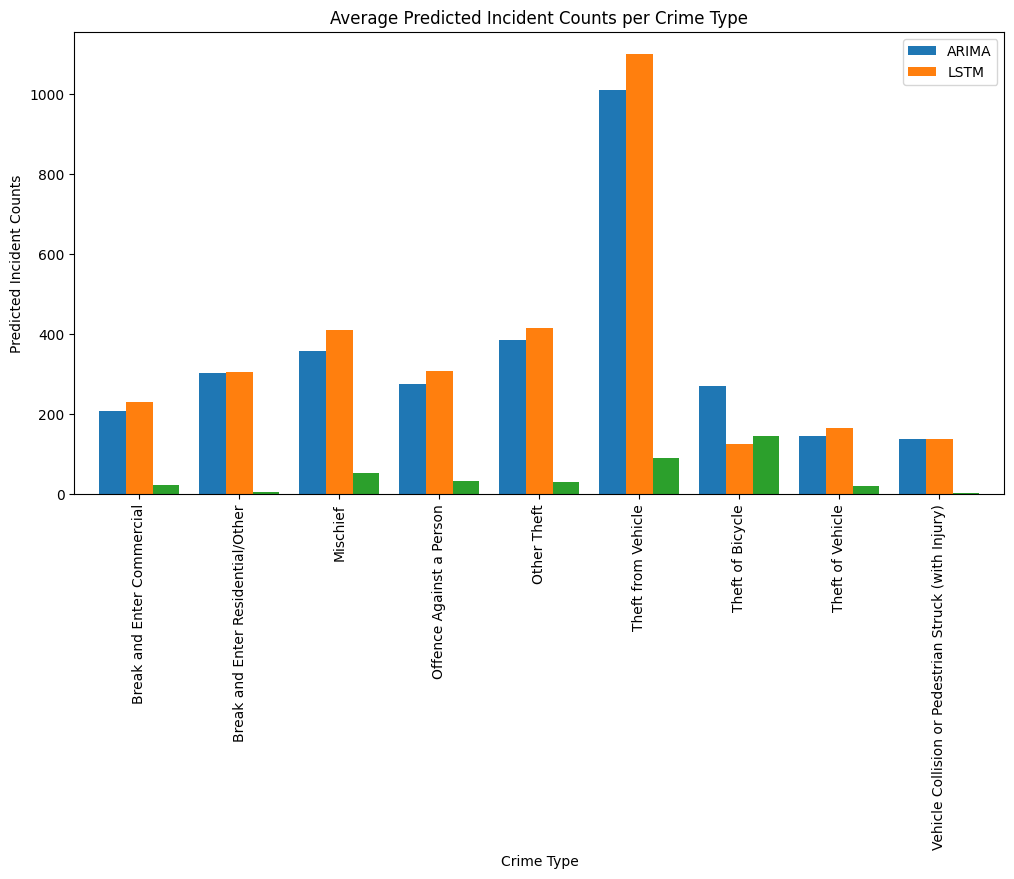

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by crime type to get average predictions
crime_type_avg = test_df.groupby("TYPE")[["Predicted_Incident_Counts_ARIMA", "Predicted_Incident_Counts_LSTM"]].mean().reset_index()

# Calculate absolute differences between predictions
crime_type_avg["Prediction_Difference"] = abs(crime_type_avg["Predicted_Incident_Counts_ARIMA"] - crime_type_avg["Predicted_Incident_Counts_LSTM"])

# 1. Bar Plot - Compare average predictions per crime type
plt.figure(figsize=(12, 6))
crime_type_avg.plot(x="TYPE", kind="bar", stacked=False, figsize=(12, 6), width=0.8)
plt.title("Average Predicted Incident Counts per Crime Type")
plt.ylabel("Predicted Incident Counts")
plt.xlabel("Crime Type")
plt.xticks(rotation=90)
plt.legend(["ARIMA", "LSTM"])
plt.show()




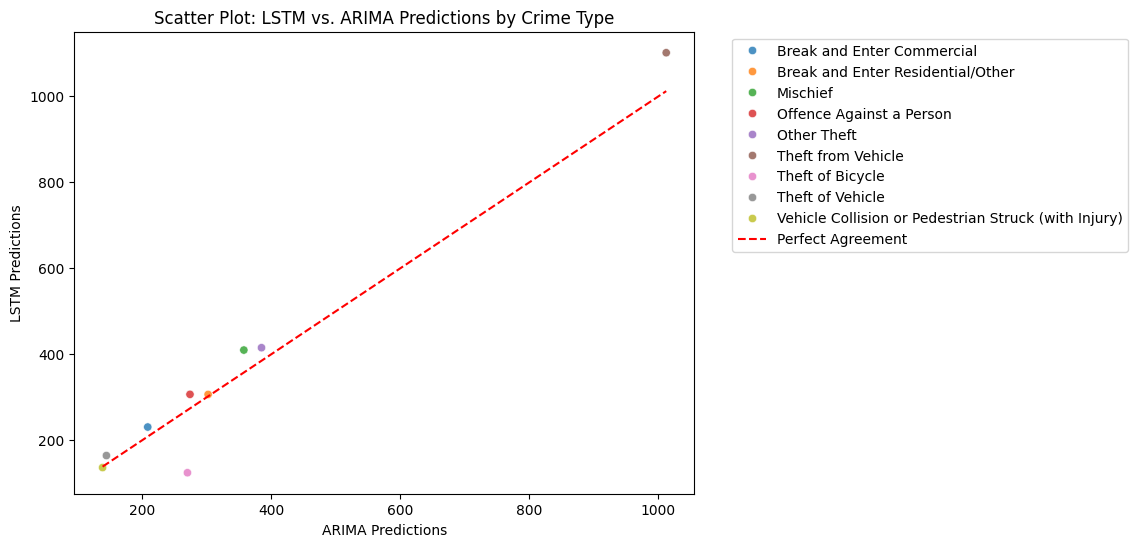

In [87]:
# 2. Scatter Plot - Show LSTM vs. ARIMA predictions per crime type
plt.figure(figsize=(8, 6))
sns.scatterplot(x=crime_type_avg["Predicted_Incident_Counts_ARIMA"], y=crime_type_avg["Predicted_Incident_Counts_LSTM"], hue=crime_type_avg["TYPE"], palette="tab10", alpha=0.8)
plt.plot([crime_type_avg["Predicted_Incident_Counts_ARIMA"].min(), crime_type_avg["Predicted_Incident_Counts_ARIMA"].max()],
         [crime_type_avg["Predicted_Incident_Counts_ARIMA"].min(), crime_type_avg["Predicted_Incident_Counts_ARIMA"].max()],
         'r--', label="Perfect Agreement")  # Diagonal reference line
plt.xlabel("ARIMA Predictions")
plt.ylabel("LSTM Predictions")
plt.title("Scatter Plot: LSTM vs. ARIMA Predictions by Crime Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Filling Missing Incident Counts Based on Model Predictions

In [85]:
# Define crime types and corresponding filling strategies
fill_with_lstm = ["Mischief", "Theft from Vehicle", "Theft of Bicycle"]
fill_with_mean = [
    "Break and Enter Commercial", "Break and Enter Residential/Other",
    "Offence Against a Person", "Other Theft",
    "Theft of Vehicle", "Vehicle Collision or Pedestrian Struck (with Injury)"
]

# Fill missing Incident_Counts
test_df["Incident_Counts"] = test_df.apply(
    lambda row: row["Predicted_Incident_Counts_LSTM"] if row["TYPE"] in fill_with_lstm else
                (row["Predicted_Incident_Counts_ARIMA"] + row["Predicted_Incident_Counts_LSTM"]) / 2
                if row["TYPE"] in fill_with_mean else row["Incident_Counts"],
    axis=1
)

# Convert Incident_Counts to integer after filling missing values
test_df["Incident_Counts"] = test_df["Incident_Counts"].astype(int)

# Check the updated dataset with random 30 rows
print(test_df.sample(30))



     YEAR  MONTH                                               TYPE  \
49   2013      1                                        Other Theft   
0    2013      6  Vehicle Collision or Pedestrian Struck (with I...   
78   2012     10                                           Mischief   
17   2013      5                         Break and Enter Commercial   
40   2013      2                                        Other Theft   
85   2012      9                                        Other Theft   
69   2012     11                                           Mischief   
153  2012      1  Vehicle Collision or Pedestrian Struck (with I...   
53   2013      1                         Break and Enter Commercial   
27   2013      3  Vehicle Collision or Pedestrian Struck (with I...   
3    2013      6                                 Theft from Vehicle   
44   2013      2                         Break and Enter Commercial   
101  2012      7                                   Theft of Bicycle   
139  2

##### Explanation

The missing values in the Incident_Counts column are filled based on the patterns observed in the predictions from ARIMA and LSTM. For crime types where LSTM predictions were consistently higher and appeared more aligned with the trend, such as Mischief, Theft from Vehicle, and Theft of Bicycle, the missing values are filled using LSTM predictions. For other crime types where ARIMA and LSTM predictions were relatively close, neither model showed a clear advantage, so taking the average provides a balanced approach. This applies to categories like Break and Enter (both Commercial and Residential/Other), Offence Against a Person, Other Theft, Theft of Vehicle, and Vehicle Collision or Pedestrian Struck (with Injury). This method ensures that we are not biased toward one model and use the most reasonable estimate based on prediction trends.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, MAE and RMSE were considered as they measure prediction accuracy by quantifying errors in incident forecasting. RMSE is particularly useful as it penalizes larger errors more, ensuring the chosen model minimizes high-impact mispredictions that could affect resource allocation and decision-making.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Both LSTM and ARIMA were used for predictions, with the final incident count being determined based on crime type. ARIMA was chosen where its predictions were closer to LSTM, LSTM was used where it was more aligned, and their mean was taken when both had significant deviations. This ensured a balanced approach that leveraged the strengths of both models for different crime types.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For time series forecasting, we used ARIMA and LSTM models. ARIMA, an autoregressive model, captures linear patterns, while LSTM, a deep learning model, handles complex temporal dependencies. Since traditional feature importance methods do not apply directly to time series models, we assessed their impact by analyzing how past incident counts influenced future predictions. SHAP values or permutation importance are not typically used for these models, but residual analysis and error metrics helped us understand which model performed better for different crime types.

# **Conclusion**

This project aimed to forecast crime incident counts using ARIMA and LSTM models, evaluating their effectiveness to determine the best prediction approach. ARIMA, a statistical model, effectively captured linear trends, while LSTM, a deep learning model, handled complex temporal dependencies. To ensure reliable predictions, we used a rolling window validation technique and assessed model performance using MAE and RMSE. The results showed variations across crime types, with some categories exhibiting closer predictions between ARIMA and LSTM, while others had significant differences. Based on this, we filled missing incident counts using ARIMA, LSTM, or their mean, depending on which model aligned better with the expected trend. Comparing prediction differences across crime types helped identify patterns where one model outperformed the other. The insights gained can support law enforcement agencies, including the FBI, in policy planning and crime prevention by providing data-driven crime forecasting. The use of multiple evaluation metrics ensured business relevance, helping to minimize errors while improving prediction accuracy. Future work could include hybrid models or additional external factors to enhance forecasting precision, making the system more robust for real-world applications.